In [169]:
# Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv


# 1. Heart Disease Analysis:

## 1.1. Data Set Up

In [170]:
# data_src = "../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv"
# data_df = pd.read_csv(data_src)

data_df = pd.read_csv("../input/personal-key-indicators-of-heart-disease/heart_2020_cleaned.csv" , sep = "," , encoding = "utf-8")

In [171]:
# Data Overview
data_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [172]:
def data_analysis(data,target):
    
    # The shape of the data
    print("The shape of the data set:")
    print(f"The data set consists of {data.shape[0]} rows and {data.shape[1]} columns.")
    
    print('\n***********************************************')
    # Missing Values Check
    print("The existence of missing values in each column:")
    print(data.isnull().any())
    
    print('\n***********************************************')
    # Info of the data
    print("General information about the data:")
    print(data.info())
    
    print('\n***********************************************')
    # Number of unique values in each column
    print("The number of unique values in each column:")
    print(data.nunique())

In [173]:
data_analysis(data_df, 'HeartDisease')

The shape of the data set:
The data set consists of 319795 rows and 18 columns.

***********************************************
The existence of missing values in each column:
HeartDisease        False
BMI                 False
Smoking             False
AlcoholDrinking     False
Stroke              False
PhysicalHealth      False
MentalHealth        False
DiffWalking         False
Sex                 False
AgeCategory         False
Race                False
Diabetic            False
PhysicalActivity    False
GenHealth           False
SleepTime           False
Asthma              False
KidneyDisease       False
SkinCancer          False
dtype: bool

***********************************************
General information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1 

## 1.2. Analytics of the Data
Now we want to have a closer look at the data to gain a deeper insight.
We will present the visualisation of the relation of each column with column
`HeartDisease` with the hope that we can draw conclusions about the factors
that contribute to heart disease as the data should tell.

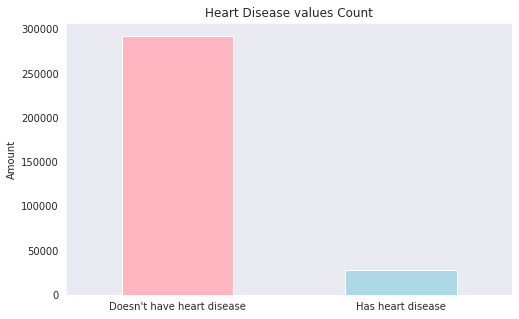

In [174]:
#plotting bar chart.
plt.figure(figsize=(8,5))
fig = data_df.HeartDisease.value_counts().plot(kind = 'bar', color=["lightpink", 'lightblue'])
fig.set_xticklabels(labels=["Doesn't have heart disease", 'Has heart disease'], rotation=0.1);
plt.title("Heart Disease values Count")
plt.ylabel("Amount");

<AxesSubplot:ylabel='HeartDisease'>

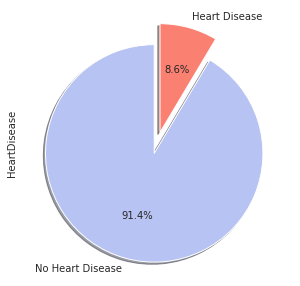

In [175]:
#visualizing in Pie chart
plt.figure(figsize=(8,5))
labels = "No Heart Disease", "Heart Disease"

data_df['HeartDisease'].value_counts().plot.pie( autopct='%1.1f%%', startangle = 90,  shadow=True, explode=[0.1,0.1], labels=labels, 
                                          colors=['#B7C3F3','salmon'])

In [176]:
HD1 = data_df[ data_df['HeartDisease'] == 'Yes'].shape[0]
HD0 = data_df[ data_df['HeartDisease'] == 'No'].shape[0]
print(f'The number of Adult that have HD is {HD1} and that does not have HD is {HD0}')

The number of Adult that have HD is 27373 and that does not have HD is 292422


In [177]:
# Visualisation Class
class VizData:
    def __init__(self, df, ccol, ft_1, ft_2):
        if type(df) == pd.core.frame.DataFrame \
            and ccol in df.columns \
            and type(ft_1) == type(ft_2) == str:
            self.df = df
            self.ft1 = ft_1
            self.ft2 = ft_2
            self.ccol = ccol
        
    # Visualisation for columns with binary values
    def binviz(self, col, idx,
                  heat_title,
                  don_all_labels, don_all_title= "Main Pie Chart",
                  don_one_title= "Pie Chart 1",
                  don_two_title= "Pie Chart 2",
                  fig_size= (8, 6),
                  binv= ["No", "Yes"]):
        if col in self.df.columns \
                and self.df[col].nunique() == 2 \
                and isinstance(idx, list) \
                and len(idx) == 2 \
                and isinstance(fig_size, tuple) \
                and len(fig_size) == 2 \
                and all(isinstance(k, int) and k > 0 for k in fig_size) \
                and isinstance(don_all_labels, list) \
                and all(isinstance(lab, str) for lab in don_all_labels) \
                and len(don_all_labels) == 4 \
                and all(isinstance(tit, str)
                        for tit in [heat_title,
                                    don_all_title,
                                    don_one_title,
                                    don_two_title]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fig = plt.figure(figsize= (n_col * fig_size[0], m_row * fig_size[1]))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # heatmap
            heat_df = pd.DataFrame(
                                    {self.ft1: [len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "Yes")
                                                            & (self.df[col] == binv[0])])
                                               ],
                                     self.ft2: [len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[1])]),
                                                len(self.df[(self.df[self.ccol] == "No")
                                                            & (self.df[col] == binv[0])])
                                               ]
                                    }, index= idx)
            ax_00 = sns.heatmap(heat_df, linewidth= 0.1,
                                annot= True, fmt= "d",
                                cmap= "Blues", ax= ax[0][0])
            ax_00.set_title(heat_title, pad= 12)
            
            # Donut Chart All
            don_all_list = [x for x in (list(heat_df[self.ft1]) + list(heat_df[self.ft2]))]
            ax_01 = ax[0][1]
            ax_01.pie(don_all_list, explode= (0.1, 0.1, 0, 0),
                      labels= don_all_labels,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "pink", "lightblue", "turquoise"])
            ax_01.set(title= don_all_title)
            cir_01 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_01.add_patch(cir_01)
            
            # Donut Chart 1
            don_one_list = list(heat_df.T[idx[0]])
            ax_10 = ax[1][0]
            ax_10.pie(don_one_list, explode= (0.1, 0),
                      labels= [self.ft1, self.ft2],
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_10.set(title= don_one_title)
            cir_10 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_10.add_patch(cir_10)
            
            # piechart 2
            don_two_list = list(heat_df[self.ft1])
            ax_11 = ax[1][1]
            ax_11.pie(don_two_list, explode= (0.1, 0),
                      labels= idx,
                      autopct= "%1.1f%%",
                      colors= ["salmon", "turquoise"])
            ax_11.set(title= don_two_title)
            cir_11 = plt.Circle((0, 0), 0.35, fc= 'white')
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()
        
    # Visualisation for columns with numeric values
    def numviz(self, col, d1_labs, d2_labs, d1_div, d2_div,
               d1_colors, d2_colors,
               xlim_1, xlim_2,
               hist_binwidth= 5,
               h1_tit= "Histogram 1", h2_tit= "Histogram 2",
               d1_tit= "Donut Chart 1", d2_tit= "Donut Chart 2",
               fig_size= (8, 6)
              ):
        if col in self.df.columns \
                and self.df[col].dtype in [int, float] \
                and all(isinstance(labs, list)
                        and all(isinstance(l, str) for l in labs)
                        for labs in [d1_labs, d2_labs]) \
                and all(isinstance(div, list)
                        and all(isinstance(d, float) or isinstance(d, int)
                                for d in div)
                        for div in [d1_div, d2_div]
                       ) \
                and len(d1_labs) == len(d1_div) + 1 \
                and len(d2_labs) == len(d2_div) + 1 \
                and all(isinstance(xl, tuple) and all(isinstance(x, int)
                                                      for x in xl)
                        for xl in [xlim_1, xlim_2]) \
                and isinstance(hist_binwidth, int) and hist_binwidth > 0 \
                and all(isinstance(tit, str)
                        for tit in [h1_tit, h2_tit, d1_tit, d2_tit]
                       ):
            sns.set_style("dark")
            m_row, n_col = 2, 2
            fw, fd = fig_size
            fig= plt.figure(figsize= (n_col * fw, m_row * fd))
            gs = fig.add_gridspec(m_row, n_col)
            ax = [[fig.add_subplot(gs[i, j]) for j in range(n_col)]
                  for i in range(m_row)]
            
            # Histogram 1
            h1_data = self.df[(self.df[self.ccol] == "Yes")][col]
            ax_00 = sns.histplot(x= h1_data, binwidth= hist_binwidth,
                                 color= "steelblue",
                                 ax= ax[0][0])
            ax_00.set_title(h1_tit, pad= 12)
            ax_00.set(ylabel= "Count", xlim= xlim_1)
            
            # Donut Chart 1
            d1_divmod = [0] + d1_div + [self.df[(self.df[self.ccol] == "Yes")][col].max()]
            d1_data = [len(self.df[(self.df[self.ccol] == "Yes")
                                   & (d1_divmod[k] <= self.df[col])
                                      & (self.df[col] < d1_divmod[k + 1])]
                          )
                       for k in range(len(d1_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "Yes")
                                      & (self.df[col] >= d1_div[-1])])]
            ax_01 = ax[0][1]
            ax_01.pie(d1_data, labels= d1_labs, autopct= "%1.1f%%", colors= d1_colors)
            ax_01.set(title= d1_tit)
            cir_01 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_01.add_patch(cir_01)
            
            # Histogram 2
            h2_data = self.df[(self.df[self.ccol] == "No")][col]
            ax_10 = sns.histplot(x= h2_data, binwidth= hist_binwidth,
                                 color= "steelblue",
                                 ax= ax[1][0])
            ax_10.set_title(h2_tit, pad= 12)
            ax_10.set(ylabel= "Count", xlim= xlim_2)
            
            # Donut 2
            d2_divmod = [0] + d2_div + [self.df[(self.df[self.ccol] == "No")][col].max()]
            d2_data = [len(self.df[(self.df[self.ccol] == "No")
                                   & ((d2_divmod[k] <= self.df[col])
                                      & (self.df[col] < d2_divmod[k + 1]))]
                          )
                       for k in range(len(d2_divmod) - 2)] \
                       + [len(self.df[(self.df[self.ccol] == "No")
                                      & (self.df[col] >= d2_div[-1])])]
            ax_11 = ax[1][1]
            ax_11.pie(d2_data, labels= d2_labs, autopct= "%1.1f%%", colors= d2_colors)
            ax_11.set(title= d2_tit)
            cir_11 = plt.Circle((0, 0), 0.35, fc= "white")
            ax_11.add_patch(cir_11)
            
            plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
            plt.show()

### **BMI and Heart Disease**

<Figure size 1440x720 with 0 Axes>

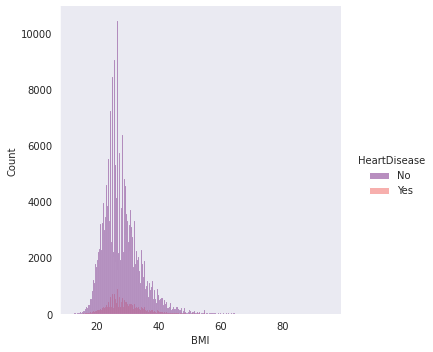

In [178]:
plt.figure(figsize=(20,10))
sns.displot(x='BMI', hue='HeartDisease', data=data_df, palette='magma')

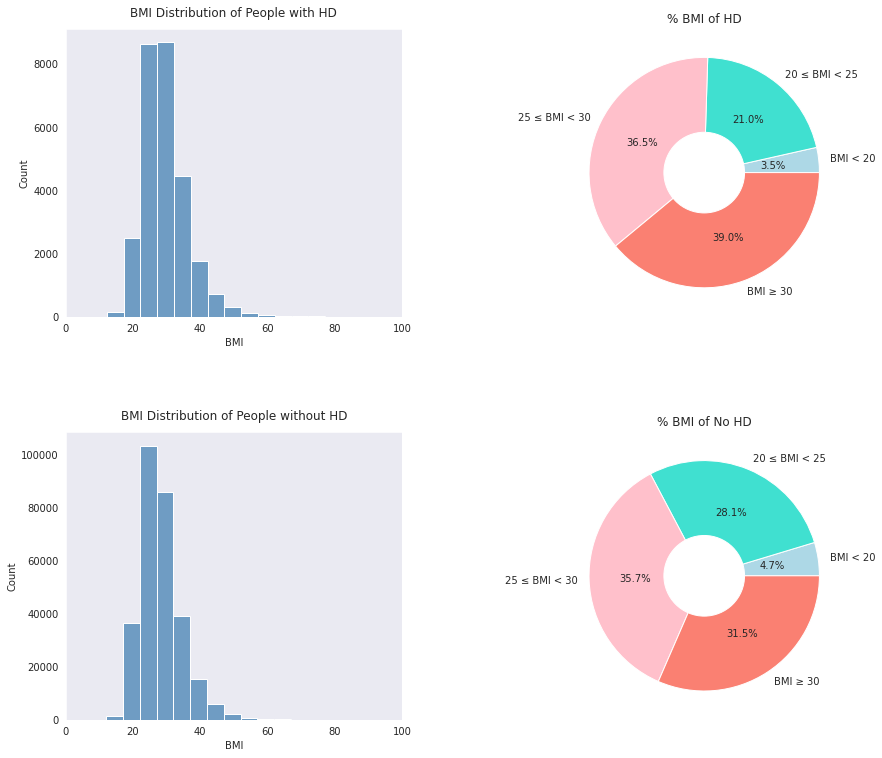

In [179]:
observ = VizData(data_df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
bmi_labs = ["BMI < 20", "20 ≤ BMI < 25", "25 ≤ BMI < 30", "BMI ≥ 30"]
bmi_div = [20, 25, 30]
observ.numviz("BMI", bmi_labs, bmi_labs, bmi_div, bmi_div,
              ["lightblue", "turquoise", "pink", "salmon"],
              ["lightblue", "turquoise", "pink", "salmon"],
              (0, 100), (0, 100),
              h1_tit= "BMI Distribution of People with HD",
              h2_tit= "BMI Distribution of People without HD",
              d1_tit= "% BMI of HD",
              d2_tit= "% BMI of No HD"
             )

### **Smoking and Heart Disease**

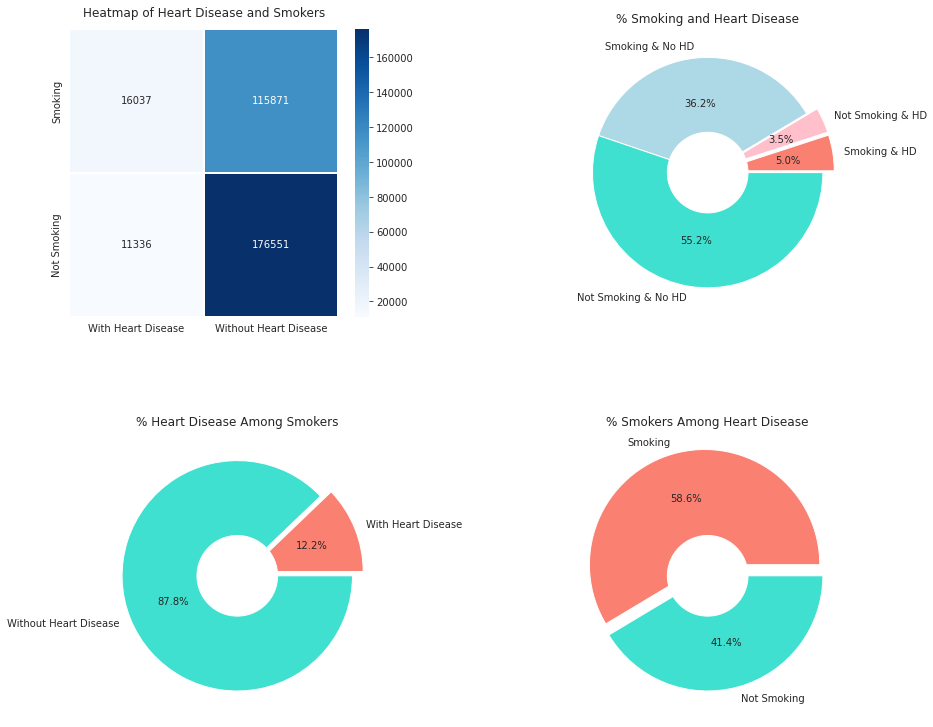

In [180]:
smoking_idx = ["Smoking", "Not Smoking"]
smoking_all_labs = ["Smoking & HD",
                    "Not Smoking & HD",
                    "Smoking & No HD",
                    "Not Smoking & No HD"]
observ.binviz("Smoking", smoking_idx,
              "Heatmap of Heart Disease and Smokers",
              smoking_all_labs,
              don_all_title= "% Smoking and Heart Disease",
              don_one_title= "% Heart Disease Among Smokers",
              don_two_title= "% Smokers Among Heart Disease")

### **Alcohol Drinking and Heart Disease**

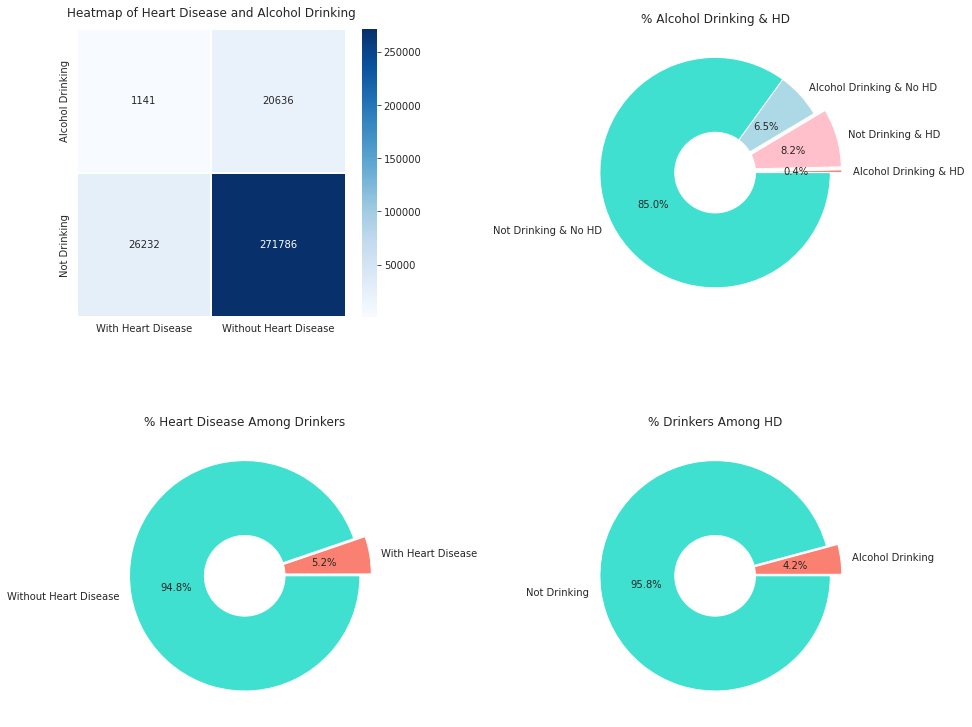

In [181]:
ad_idx= ["Alcohol Drinking", "Not Drinking"]
ad_all_labs = ["Alcohol Drinking & HD",
               "Not Drinking & HD",
               "Alcohol Drinking & No HD",
               "Not Drinking & No HD"]
observ.binviz("AlcoholDrinking", ad_idx,
              "Heatmap of Heart Disease and Alcohol Drinking",
              ad_all_labs,
              don_all_title= "% Alcohol Drinking & HD",
              don_one_title= "% Heart Disease Among Drinkers",
              don_two_title= "% Drinkers Among HD")

### **Stroke and Heart Disease**

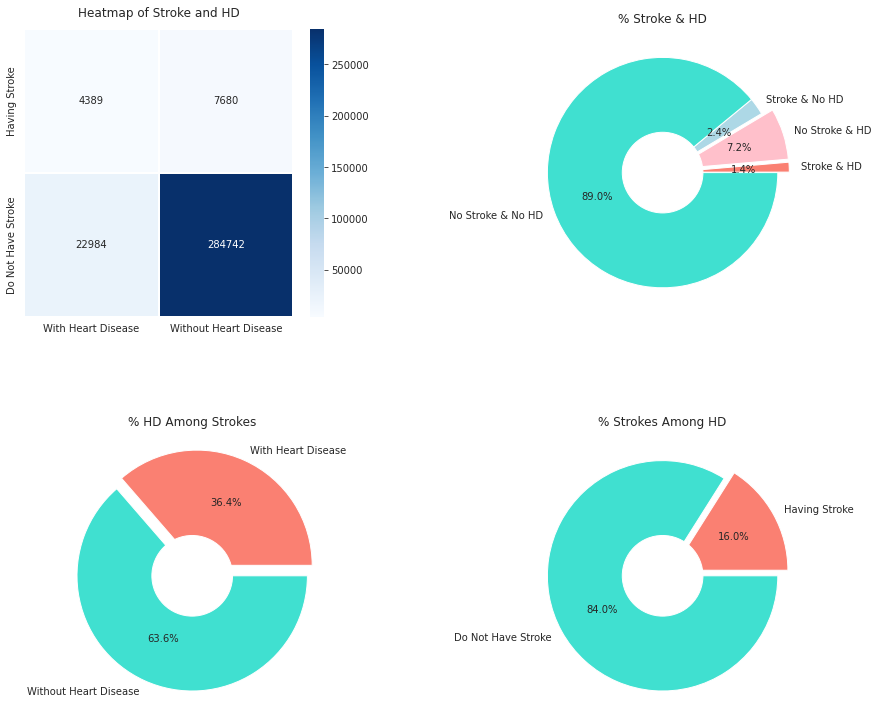

In [182]:
stroke_idx = ["Having Stroke", "Do Not Have Stroke"]
stroke_all_labs = ["Stroke & HD",
                   "No Stroke & HD",
                   "Stroke & No HD",
                   "No Stroke & No HD"]
observ.binviz("Stroke", stroke_idx,
              "Heatmap of Stroke and HD",
              stroke_all_labs,
              don_all_title= "% Stroke & HD",
              don_one_title= "% HD Among Strokes",
              don_two_title= "% Strokes Among HD")

### **Physical Health Problems and Heart Disease**

Text(0.5, 0, 'Physical Health Problems')

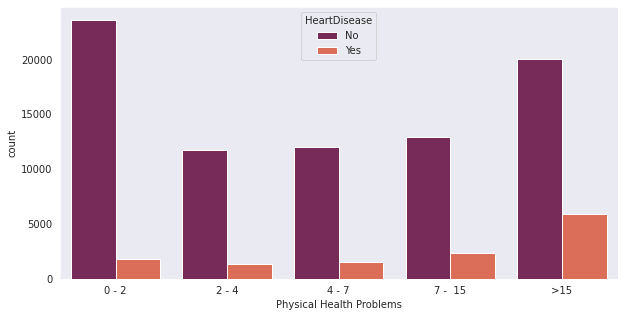

In [183]:
plt.figure(figsize=(10,5))
#Explore the Physical health problem feature
ph_bins = pd.cut(data_df["PhysicalHealth"],  bins=[0,2,4,7,15,np.inf],  labels=["0 - 2","2 - 4","4 - 7","7 -  15"," >15 "])

sns.countplot(x = ph_bins, palette='rocket', hue=data_df['HeartDisease'])
plt.xlabel('Physical Health Problems')

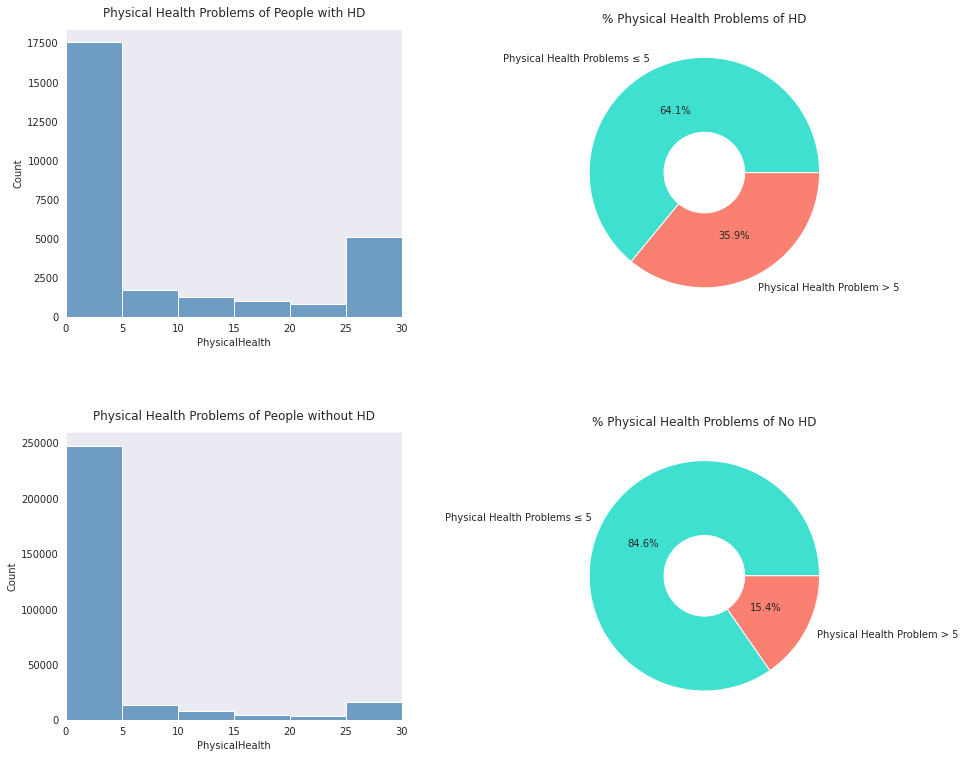

In [184]:
php_labs = ["Physical Health Problems ≤ 5", "Physical Health Problem > 5"]
php_div = [5]
observ.numviz("PhysicalHealth",
              php_labs, php_labs,
              php_div, php_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Physical Health Problems of People with HD",
              h2_tit= "Physical Health Problems of People without HD",
              d1_tit= "% Physical Health Problems of HD",
              d2_tit= "% Physical Health Problems of No HD")

### **Mental Health Problems and Heart Disease**

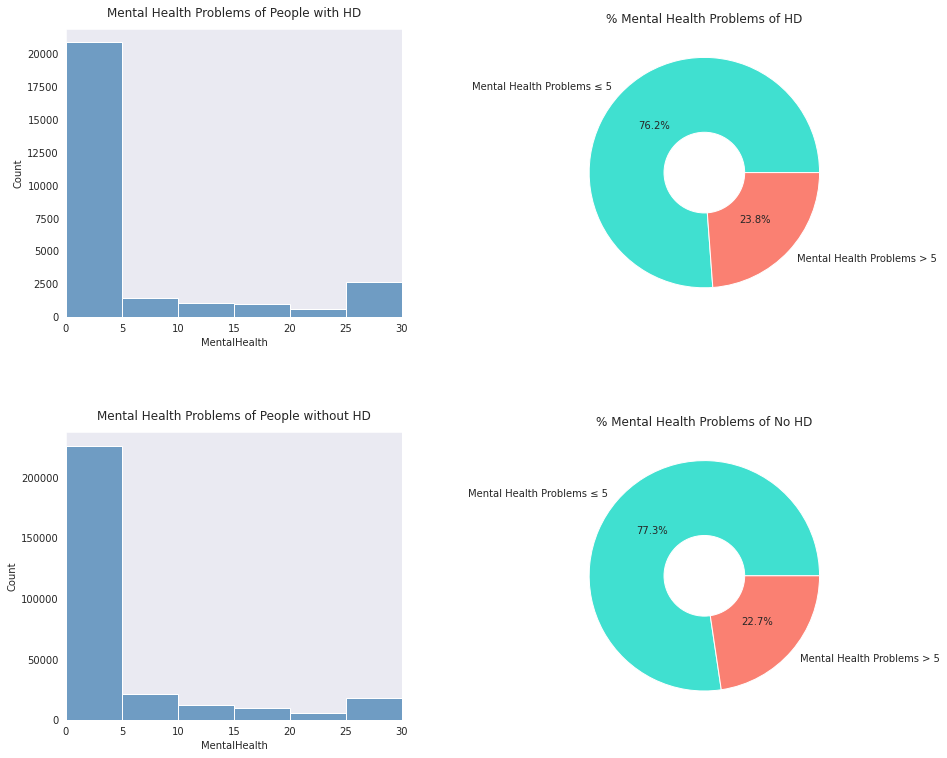

In [185]:
mhp_labs = ["Mental Health Problems ≤ 5", "Mental Health Problems > 5"]
mhp_div = [5]
observ.numviz("MentalHealth",
              mhp_labs, mhp_labs,
              mhp_div, mhp_div,
              ["turquoise", "salmon"],
              ["turquoise", "salmon"],
              (0, 30), (0, 30),
              h1_tit= "Mental Health Problems of People with HD",
              h2_tit= "Mental Health Problems of People without HD",
              d1_tit= "% Mental Health Problems of HD",
              d2_tit= "% Mental Health Problems of No HD")

### **Difficulty Walking and Heart Disease**

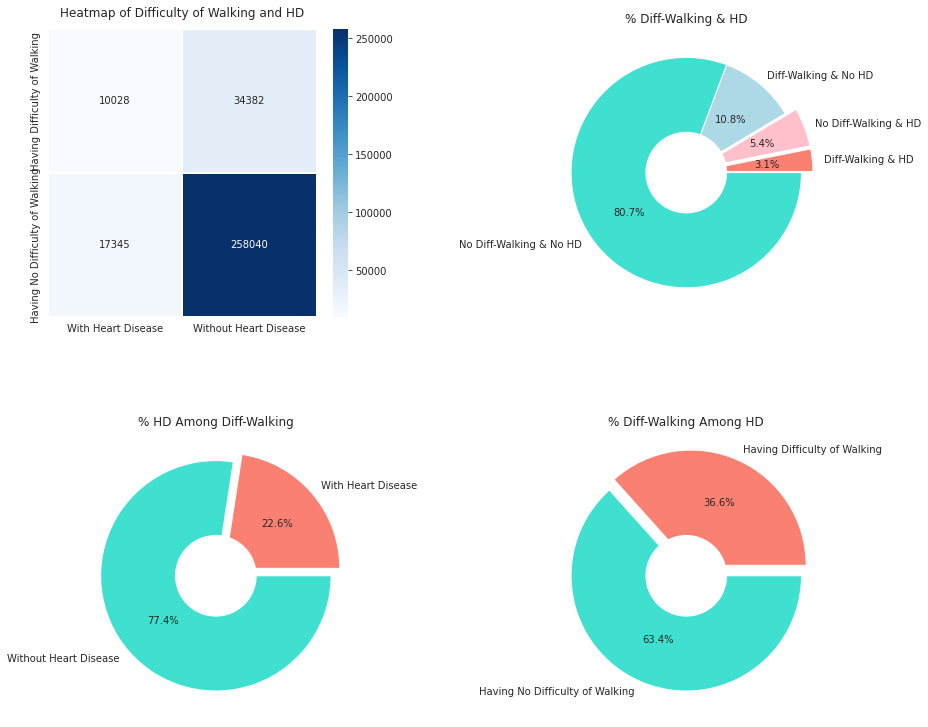

In [186]:
diffw_idx = ["Having Difficulty of Walking", "Having No Difficulty of Walking"]
diffw_all_labs = ["Diff-Walking & HD",
                  "No Diff-Walking & HD",
                  "Diff-Walking & No HD",
                  "No Diff-Walking & No HD"]
observ.binviz("DiffWalking", diffw_idx,
              "Heatmap of Difficulty of Walking and HD",
              diffw_all_labs,
              don_all_title= "% Diff-Walking & HD",
              don_one_title= "% HD Among Diff-Walking",
              don_two_title= "% Diff-Walking Among HD")

### **Sex(Gender) and Heart Disease**

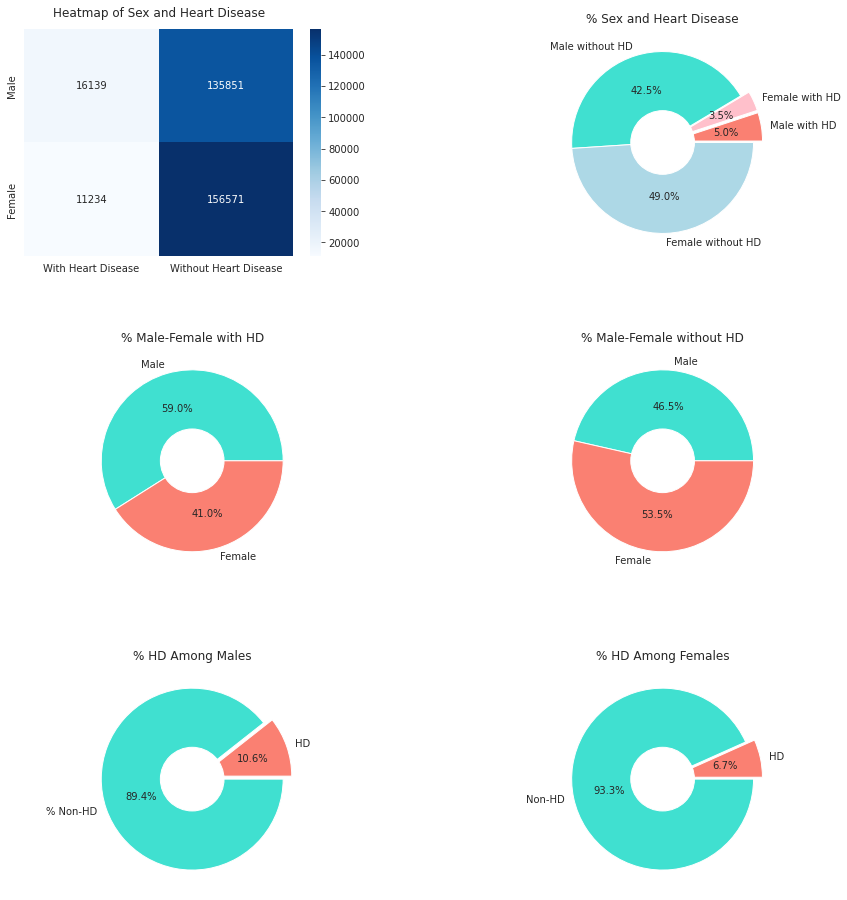

In [187]:
g_row, g_col = 3, 2
g_fig = plt.figure(figsize= (g_col * 8, g_row * 5))
g_gs = g_fig.add_gridspec(g_row, g_col)
g_ax = [[g_fig.add_subplot(g_gs[i, j]) for j in range(g_col)]
        for i in range(g_row)]
sns.set_style("dark")

# Heatmap of Sex and Heart Disease
sex_hd_data = [
    len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
    len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")]),
    len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
    len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])
]
sex_hd_data = pd.DataFrame(
    {"With Heart Disease": [
        len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
        len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")])],
     "Without Heart Disease": [
         len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
         len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
    },
    index= ["Male", "Female"])
gax_00 = sns.heatmap(data= sex_hd_data,
#                      linewidth= 0.1,
                     annot= True, fmt= "d",
                     cmap= "Blues",
                     ax= g_ax[0][0])
gax_00.set_title("Heatmap of Sex and Heart Disease", pad= 12)

# Donut Chart All
don_all_data = list(sex_hd_data["With Heart Disease"].values) \
                + list(sex_hd_data["Without Heart Disease"].values)
gax_01 = g_ax[0][1]
gax_01.pie(don_all_data, explode= (0.1, 0.1, 0, 0),
           labels= ["Male with HD",
                    "Female with HD",
                    "Male without HD",
                    "Female without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "pink", "turquoise", "lightblue"]
          )
gax_01.set_title("% Sex and Heart Disease")
cirg_01 = plt.Circle((0, 0), 0.35, fc= "white")
gax_01.add_patch(cirg_01)

# Donut Chart Male-Female % of HD Population
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")])]
gax_10 = g_ax[1][0]
gax_10.pie(don_10_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_10.set_title("% Male-Female with HD")
cirg_10 = plt.Circle((0, 0), 0.35, fc= "white")
gax_10.add_patch(cirg_10)

# Donut Chart Male-Female % of No HD Population
don_11_data = [len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
gax_11 = g_ax[1][1]
gax_11.pie(don_11_data,
           labels= ["Male", "Female"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
gax_11.set_title("% Male-Female without HD")
cirg_11 = plt.Circle((0, 0), 0.35, fc= "white")
gax_11.add_patch(cirg_11)

# Donut Chart of HD Among Males
don_20_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Male")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Male")])]
gax_20 = g_ax[2][0]
gax_20.pie(don_20_data, explode= (0.1, 0),
           labels= ["HD", "% Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_20.set_title("% HD Among Males")
cirg_20 = plt.Circle((0, 0), 0.35, fc= "white")
gax_20.add_patch(cirg_20)

# Donut Chart of HD Among Females
don_21_data = [len(data_df[(data_df["HeartDisease"] == "Yes") & (data_df["Sex"] == "Female")]),
               len(data_df[(data_df["HeartDisease"] == "No") & (data_df["Sex"] == "Female")])]
gax_21 = g_ax[2][1]
gax_21.pie(don_21_data, explode= (0.1, 0),
           labels= ["HD", "Non-HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
gax_21.set_title("% HD Among Females")
cirg_21 = plt.Circle((0, 0), 0.35, fc= "white")
gax_21.add_patch(cirg_21)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### **Age Category and Heart Disease**

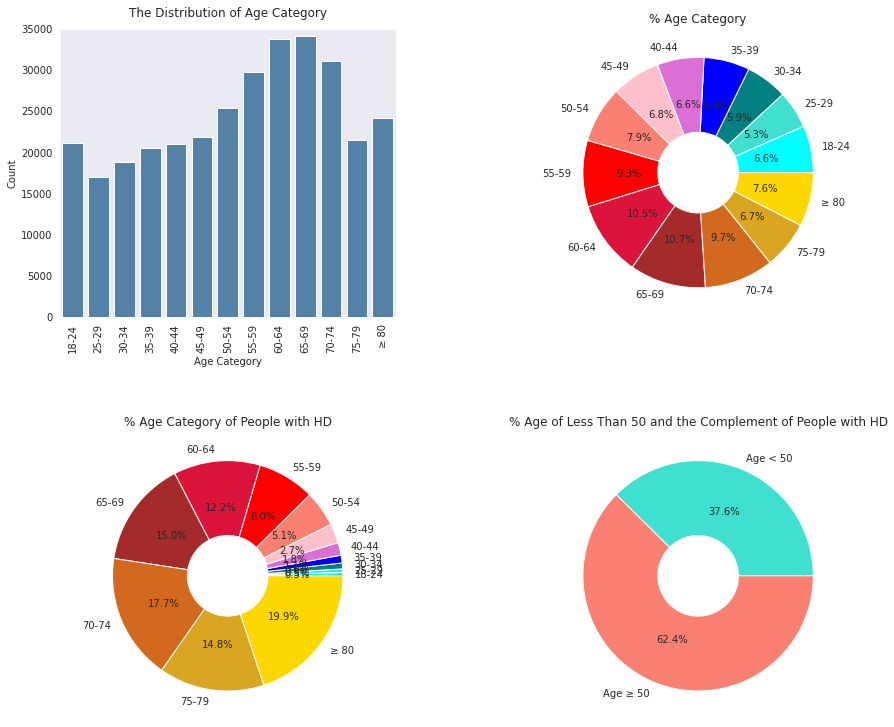

In [188]:
h_row, h_col = 2, 2
h_fig = plt.figure(figsize= (h_col *8, h_row *6))
h_gs = h_fig.add_gridspec(h_row, h_col)
h_ax = [[h_fig.add_subplot(h_gs[i, j]) for j in range(h_col)]
        for i in range(h_row)]

h_colors = ["aqua", "turquoise", "teal",
            "blue", "orchid", "pink",
            "salmon", "red", "crimson",
            "brown", "chocolate", "goldenrod",
            "gold"]
h_val_uniq = sorted(list(data_df["AgeCategory"].unique()))
h_labels = h_val_uniq[0: -1] + ["≥ 80"]

# Barplot
# bar_h_x = sorted(list(data_df["AgeCategory"].unique()))
bar_h_height = [list(data_df["AgeCategory"]).count(x) for x in h_val_uniq]
# bar_h_labels = bar_h_x[0:-1] + ["≥ 80"]
hax_00 = sns.barplot(x= h_val_uniq, y= bar_h_height,
                     color= "steelblue",
                     ax= h_ax[0][0])
hax_00.set_title("The Distribution of Age Category", pad= 12)
hax_00.set(xlabel= "Age Category",
           ylabel= "Count", ylim= (0, 35000))
hax_00.set_xticklabels(h_labels, rotation= "vertical")

# Donut Chart of Age Category within the Whole Population
don_h01_data = bar_h_height
# don_h01_labels = bar_h_labels
hax_01 = h_ax[0][1]
hax_01.pie(don_h01_data,
           labels= h_labels,
           autopct= "%1.1f%%", colors= h_colors
           )
hax_01.set_title("% Age Category")
cirh_01 = plt.Circle((0, 0), 0.35, fc= "white")
hax_01.add_patch(cirh_01)

# Donut Chart of Age Category within People with HD
don_h10_data = [list(data_df[(data_df["HeartDisease"] == "Yes")]["AgeCategory"]).count(x)
                for x in h_val_uniq]
hax_10 = h_ax[1][0]
hax_10.pie(don_h10_data,
           labels= h_labels,
           autopct= "%1.1f%%",
           colors= h_colors)
hax_10.set_title("% Age Category of People with HD")
cirh_10 = plt.Circle((0, 0), 0.35, fc= "white")
hax_10.add_patch(cirh_10)

# Donut Chart of New Age Category within People without HD
don_h11_data = [sum(bar_h_height[0:6]), sum(bar_h_height[6:])]
hax_11 = h_ax[1][1]
hax_11.pie(don_h11_data,
           labels= ["Age < 50", "Age ≥ 50"],
           autopct= "%1.1f%%",
           colors= ["turquoise", "salmon"])
hax_11.set_title("% Age of Less Than 50 and the Complement of People with HD")
cirh_11 = plt.Circle((0, 0), 0.35, fc= "white")
hax_11.add_patch(cirh_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### **Race and Heart Disease**

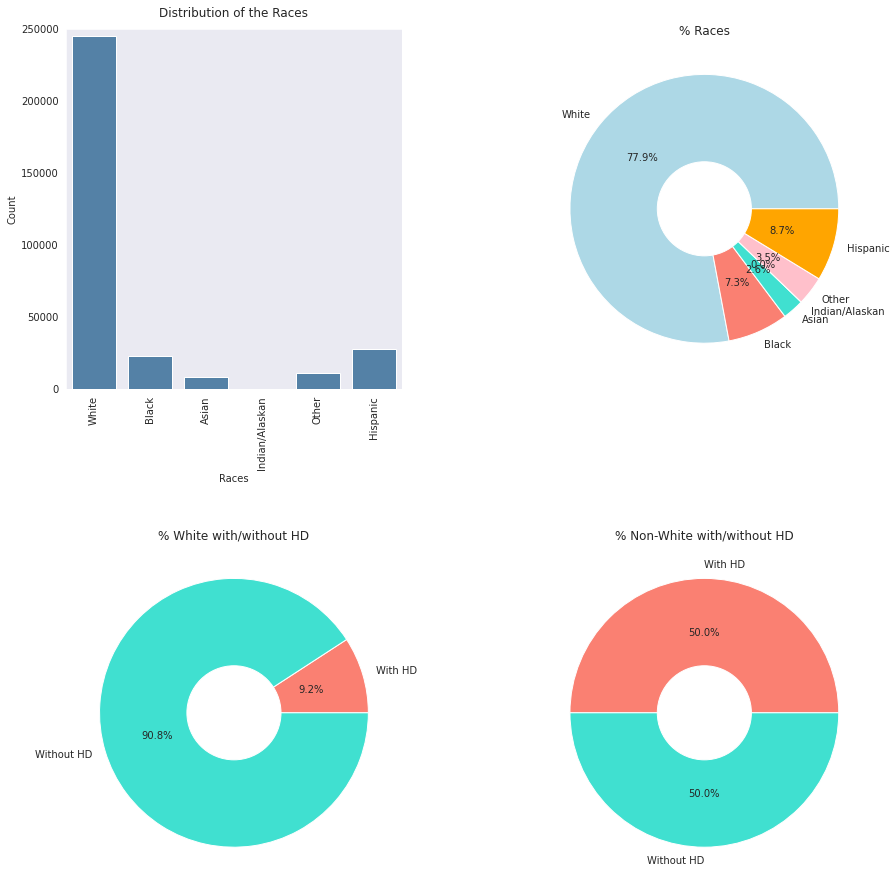

In [189]:
i_row, i_col = 2, 2
i_fig = plt.figure(figsize= (i_col *8, i_row *6))
i_gs = i_fig.add_gridspec(i_row, i_col)
i_ax = [[i_fig.add_subplot(i_gs[i, j]) for j in range(i_col)]
        for i in range(i_row)]

i_uniq_vals = list(data_df["Race"].unique())
i_labels = i_uniq_vals
i_labels[3] = "Indian/Alaskan"
i_colors = ["lightblue", "salmon", "turquoise", "yellow", "pink", "orange"]

# Distribution of the Races within the Population
bar_i00_data = [list(data_df["Race"]).count(x) for x in i_uniq_vals]
bar_i00_labs = i_uniq_vals
iax_00 = sns.barplot(x= i_uniq_vals, y= bar_i00_data,
                     color= "steelblue",
                     ax= i_ax[0][0])
iax_00.set_title("Distribution of the Races", pad= 12)
iax_00.set(xlabel= "Races", ylabel= "Count", ylim= (0, 250000))
iax_00.set_xticklabels(i_labels, rotation= "vertical")

# Donut Chart of the Races
don_i01_data = bar_i00_data
iax_01 = i_ax[0][1]
iax_01.pie(don_i01_data,
           labels= i_labels,
           autopct= "%1.1f%%",
           colors= i_colors)
iax_01.set_title("% Races")
ciri_01 = plt.Circle((0, 0), 0.35, fc= "white")
iax_01.add_patch(ciri_01)

# Donut Chart of White with HD
don_i10_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] == "White")]),
                len(data_df[(data_df["HeartDisease"] == "No")
                             & (data_df["Race"] == "White")])]
iax_10 = i_ax[1][0]
iax_10.pie(don_i10_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_10.set_title("% White with/without HD")
ciri_10 = plt.Circle((0, 0), 0.35, fc= "white")
iax_10.add_patch(ciri_10)

# Donut Chart of Non-White with HD
don_i11_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] != "White")]),
                len(data_df[(data_df["HeartDisease"] == "Yes")
                             & (data_df["Race"] != "White")])]
iax_11 = i_ax[1][1]
iax_11.pie(don_i11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
iax_11.set_title("% Non-White with/without HD")
ciri_11 = plt.Circle((0, 0), 0.35, fc= "white")
iax_11.add_patch(ciri_11)


plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### **Diabetic Conditions and Heart Disease**

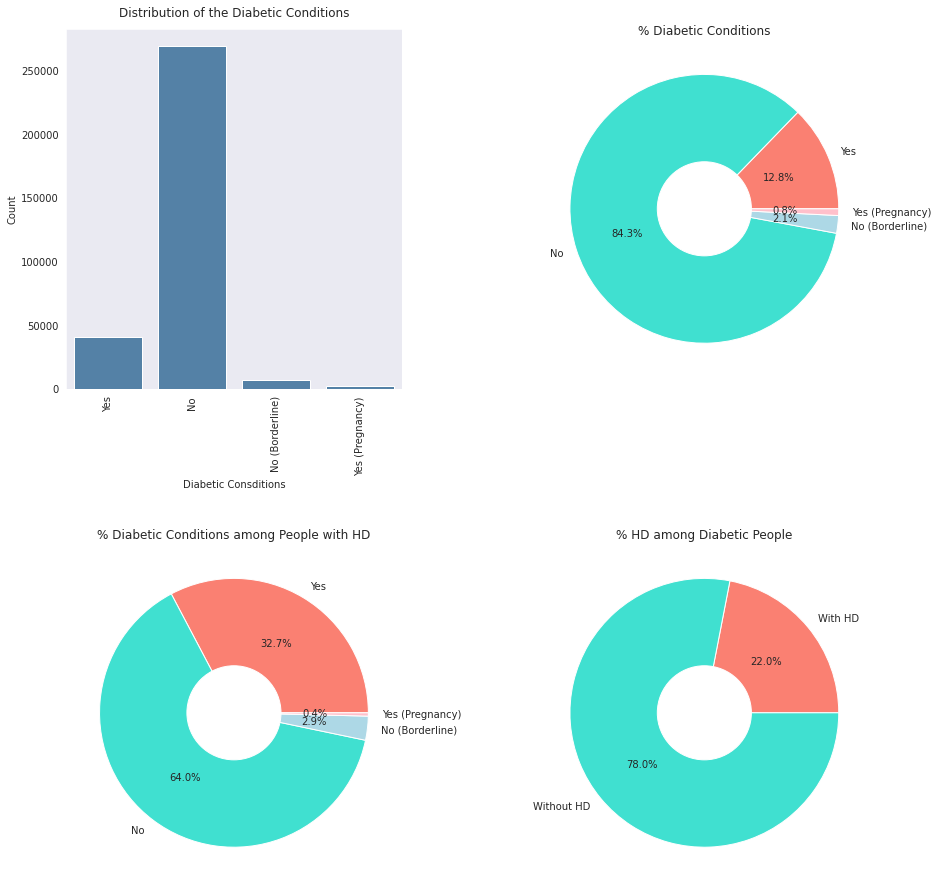

In [190]:
j_row, j_col = 2, 2
j_fig = plt.figure(figsize= (j_col *8, j_row *6))
j_gs = j_fig.add_gridspec(j_row, j_col)
j_ax = [[j_fig.add_subplot(j_gs[i, j]) for j in range(j_col)]
        for i in range(j_row)]

j_labels = ["Yes", "No", "No (Borderline)", "Yes (Pregnancy)"]

# Distribution of the Diabetic Conditions
bar_j00_data = [len(data_df[(data_df["Diabetic"] == cond)])
                for cond in data_df["Diabetic"].unique()]
jax_00 = sns.barplot(x= data_df["Diabetic"].unique(), y= bar_j00_data,
                     color= "steelblue",
                     ax= j_ax[0][0])
jax_00.set_title("Distribution of the Diabetic Conditions", pad= 12)
jax_00.set(xlabel= "Diabetic Consditions", ylabel= "Count")
jax_00.set_xticklabels(j_labels, rotation= "vertical")

# Donut Chart of the Diabetic Conditions within the Population
don_j01_data = bar_j00_data
jax_01 = j_ax[0][1]
jax_01.pie(don_j01_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_01.set_title("% Diabetic Conditions")
cirj_01 = plt.Circle((0, 0), 0.35, fc= "white")
jax_01.add_patch(cirj_01)

# Donut Chart of Diabetic Conditions among People with HD
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                           & (data_df["Diabetic"] == cond)])
                for cond in data_df["Diabetic"].unique()]
jax_10 = j_ax[1][0]
jax_10.pie(don_10_data,
           labels= j_labels,
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise", "lightblue", "pink"])
jax_10.set_title("% Diabetic Conditions among People with HD")
cirj_10 = plt.Circle((0, 0), 0.35, fc= "white")
jax_10.add_patch(cirj_10)

# Donut Chart of HD among People with Diabetic
don_11_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                           & (data_df["Diabetic"] == "Yes")]),
               len(data_df[(data_df["HeartDisease"] == "No")
                           & (data_df["Diabetic"] == "Yes")])]
jax_11 = j_ax[1][1]
jax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
jax_11.set_title("% HD among Diabetic People")
cirj_11 = plt.Circle((0, 0), 0.35, fc= "white")
jax_11.add_patch(cirj_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=1.1, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### **Physical Activity and Heart Disease**

In [191]:
train_mod_df = data_df.copy()
dummy_list = []
for val in train_mod_df["PhysicalActivity"]:
    dummy_list.append("Yes") if val == "No" else dummy_list.append("No")
train_mod_df["LackPhysAct"] = dummy_list

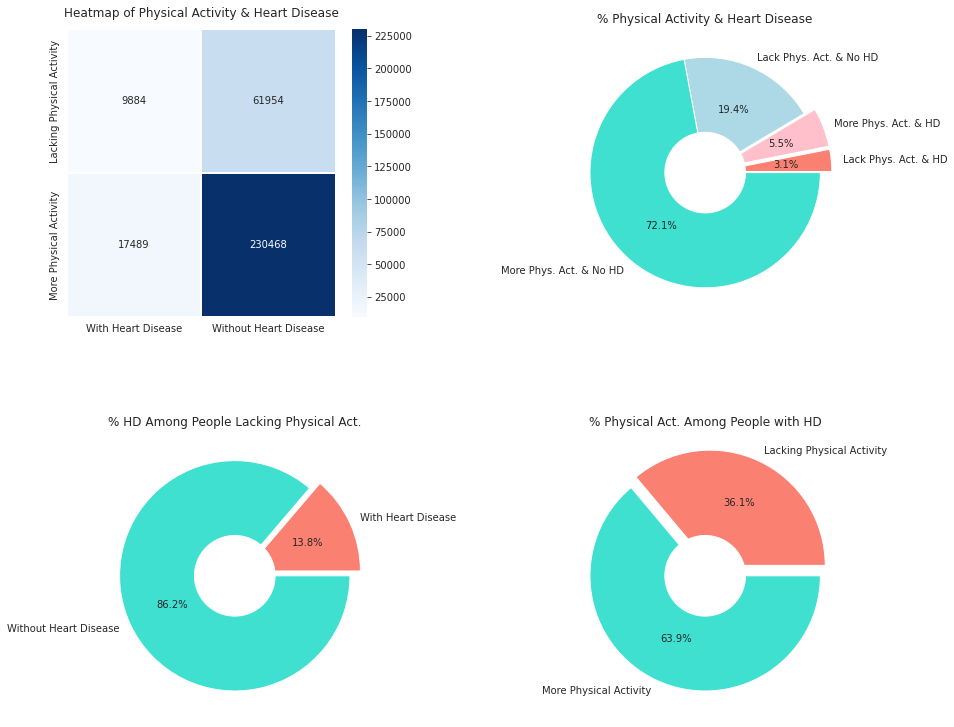

In [192]:
observ_k = VizData(train_mod_df, "HeartDisease", "With Heart Disease", "Without Heart Disease")
observ_k.binviz("LackPhysAct",
              ["Lacking Physical Activity", "More Physical Activity"],
              "Heatmap of Physical Activity & Heart Disease",
              ["Lack Phys. Act. & HD", "More Phys. Act. & HD",
               "Lack Phys. Act. & No HD", "More Phys. Act. & No HD"],
              don_all_title= "% Physical Activity & Heart Disease",
              don_one_title= "% HD Among People Lacking Physical Act.",
              don_two_title= "% Physical Act. Among People with HD")

### **General Health and Heart Disease**

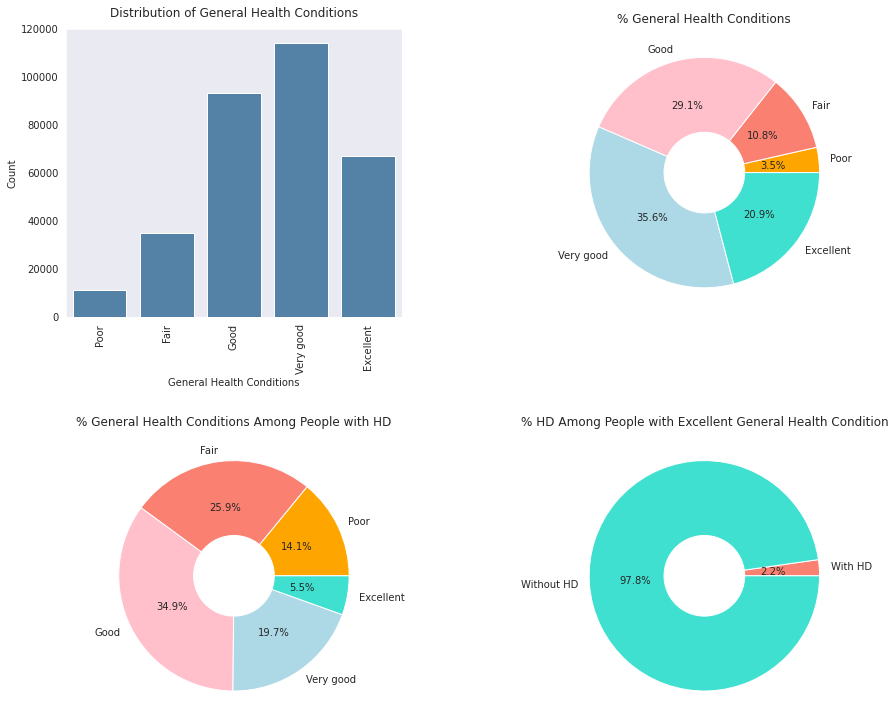

In [193]:
l_row, l_col = 2, 2
l_fig = plt.figure(figsize= (l_col *8, l_row *6))
l_gs = l_fig.add_gridspec(l_row, l_col)
l_ax = [[l_fig.add_subplot(l_gs[i, j]) for j in range(l_col)]
        for i in range(l_row)]

l_uniq = ["Poor", "Fair", "Good", "Very good", "Excellent"]
l_colors = ["orange", "salmon", "pink", "lightblue", "turquoise"]

# Distribution of the General Health Conditions Among the Population
bar_l00_data = [len(data_df[(data_df["GenHealth"] == x)]) for x in l_uniq]
lax_00 = sns.barplot(x= l_uniq, y= bar_l00_data,
                     color= "steelblue",
                     ax= l_ax[0][0])
lax_00.set_title("Distribution of General Health Conditions",
                 pad= 12)
lax_00.set(xlabel= "General Health Conditions",
           ylabel= "Count",
           ylim= (0, 120000))
lax_00.set_xticklabels(l_uniq, rotation= "vertical")

# Donut Chart of the General Health Conditions Among the Population
don_l00_data = bar_l00_data
lax_01 = l_ax[0][1]
lax_01.pie(don_l00_data,
           labels= l_uniq,
           autopct= "%1.1f%%",
           colors= l_colors)
lax_01.set_title("% General Health Conditions")
cirl_01 = plt.Circle((0, 0), 0.35, fc= "white")
lax_01.add_patch(cirl_01)

# Donut Chart of General Health Conditions Among People with HD
don_10_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                            & (data_df["GenHealth"] == x)])
               for x in l_uniq]
lax_10 = l_ax[1][0]
lax_10.pie(don_10_data,
           labels= l_uniq,
           autopct= "%1.1f%%",
           colors= l_colors)
lax_10.set_title("% General Health Conditions Among People with HD")
cirl_10 = plt.Circle((0, 0), 0.35, fc= "white")
lax_10.add_patch(cirl_10)

# Donut Chart of HD Among People with Non-Excellent General Health Conditions
don_11_data = [len(data_df[(data_df["HeartDisease"] == "Yes")
                            & (data_df["GenHealth"] == "Excellent")]),
               len(data_df[(data_df["HeartDisease"] == "No")
                            & (data_df["GenHealth"] == "Excellent")])]
lax_11 = l_ax[1][1]
lax_11.pie(don_11_data,
           labels= ["With HD", "Without HD"],
           autopct= "%1.1f%%",
           colors= ["salmon", "turquoise"])
lax_11.set_title("% HD Among People with Excellent General Health Condition")
cirl_11 = plt.Circle((0, 0), 0.35, fc= "white")
lax_11.add_patch(cirl_11)

plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.8, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

### **Sleep Time and Heart Disease**

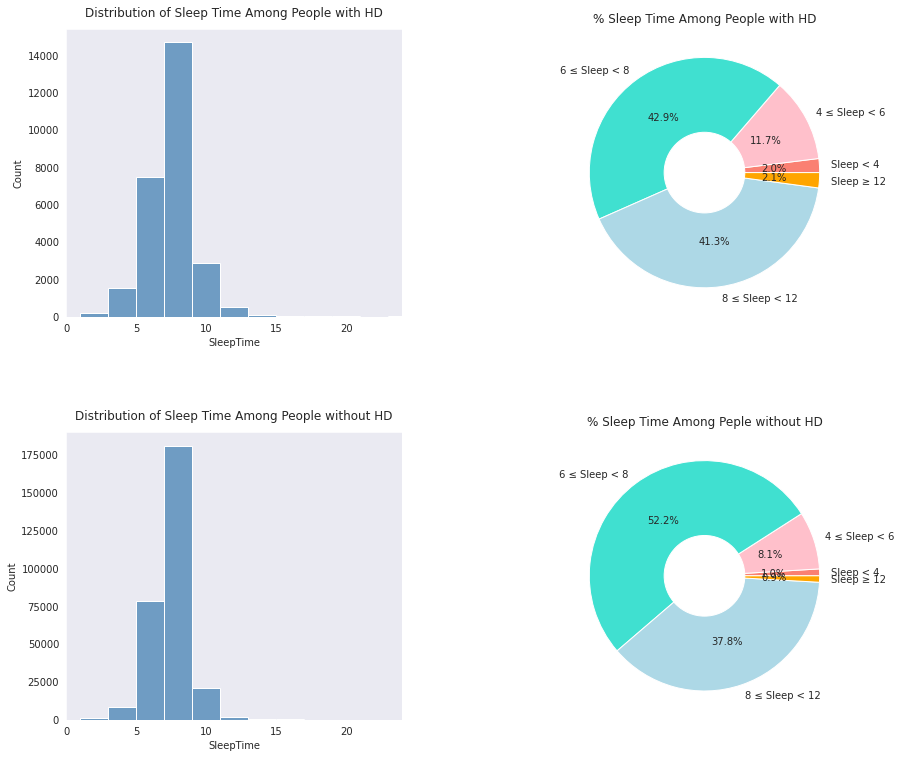

In [194]:
m_labs = ["Sleep < 4", "4 ≤ Sleep < 6", "6 ≤ Sleep < 8", "8 ≤ Sleep < 12", "Sleep ≥ 12"]
m_div = [4, 6, 8, 12]
m_colors = ["salmon", "pink", "turquoise", "lightblue", "orange"]
observ.numviz("SleepTime", m_labs, m_labs,
              m_div, m_div,
              m_colors, m_colors,
              (0, 24), (0, 24),
              hist_binwidth= 2,
              h1_tit= "Distribution of Sleep Time Among People with HD",
              h2_tit= "Distribution of Sleep Time Among People without HD",
              d1_tit= "% Sleep Time Among People with HD",
              d2_tit= "% Sleep Time Among Peple without HD")

### **Asthma and Heart Disease**

<AxesSubplot:xlabel='Asthma', ylabel='count'>

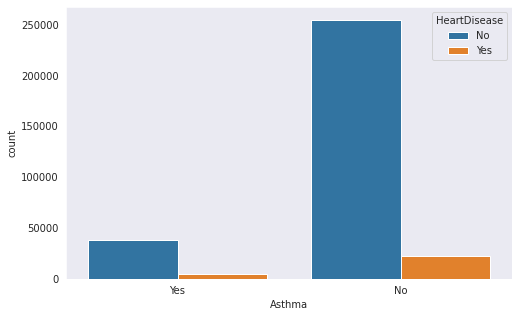

In [195]:
plt.figure(figsize=(8,5))
sns.countplot(x='Asthma', hue='HeartDisease', data=data_df)

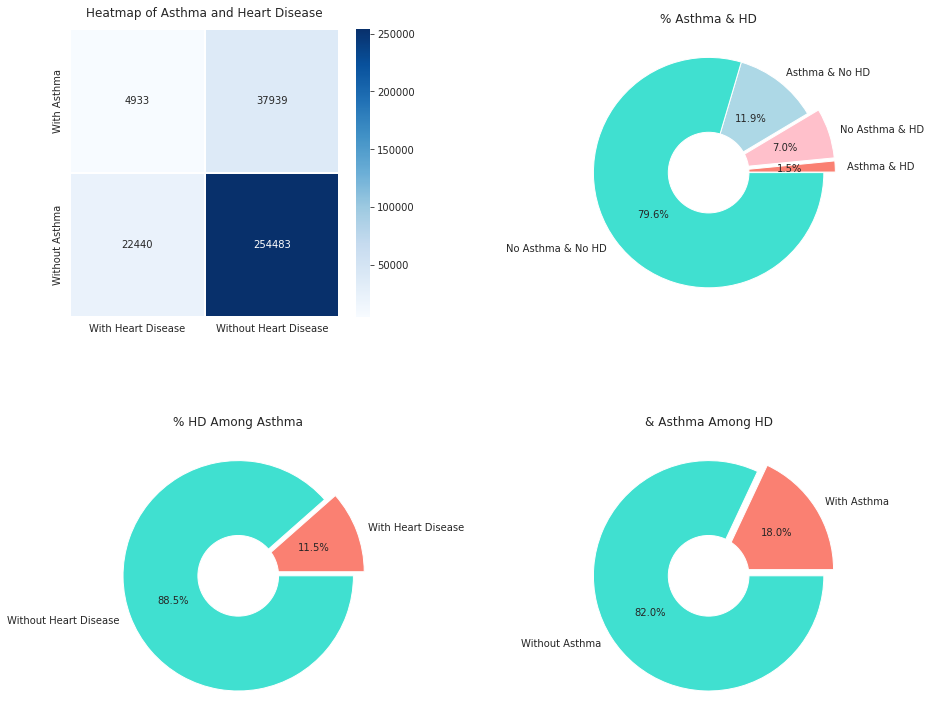

In [196]:
observ.binviz("Asthma", ["With Asthma", "Without Asthma"],
              "Heatmap of Asthma and Heart Disease",
              ["Asthma & HD",
               "No Asthma & HD",
               "Asthma & No HD",
               "No Asthma & No HD"],
              don_all_title= "% Asthma & HD",
              don_one_title= "% HD Among Asthma",
              don_two_title= "& Asthma Among HD")

### **Kidney Disease and Heart Disease**

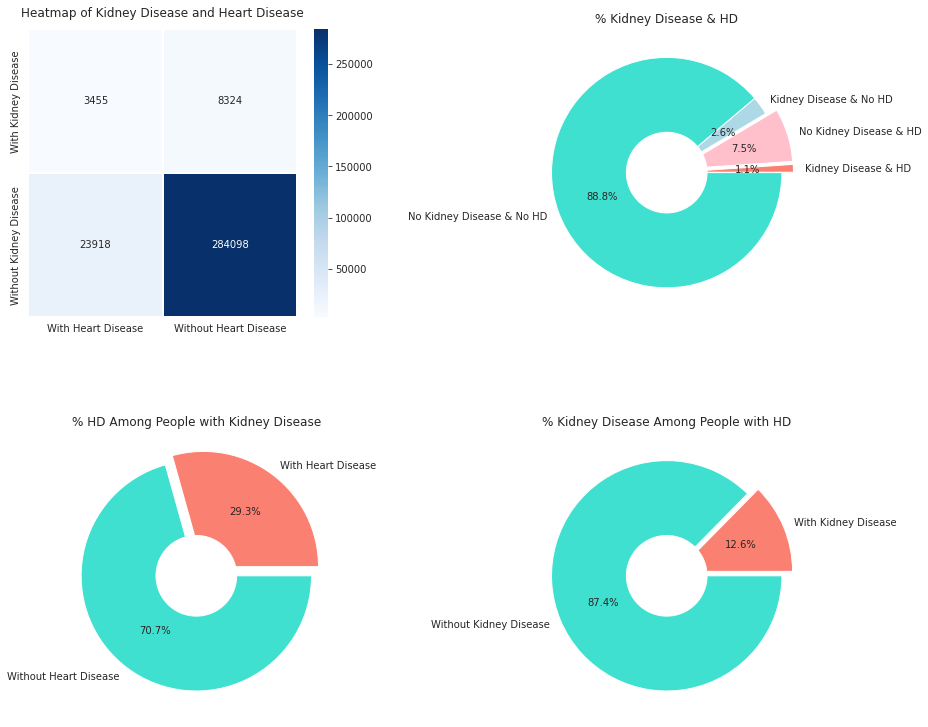

In [197]:
observ.binviz("KidneyDisease",
              ["With Kidney Disease", "Without Kidney Disease"],
              "Heatmap of Kidney Disease and Heart Disease",
              ["Kidney Disease & HD",
               "No Kidney Disease & HD",
               "Kidney Disease & No HD",
               "No Kidney Disease & No HD"],
              don_all_title= "% Kidney Disease & HD",
              don_one_title= "% HD Among People with Kidney Disease",
              don_two_title= "% Kidney Disease Among People with HD")

### **Skin Cancer and Heart Disease**

<AxesSubplot:xlabel='SkinCancer', ylabel='count'>

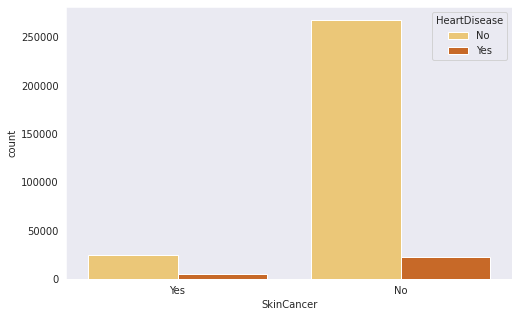

In [198]:
plt.figure(figsize=(8,5))
sns.countplot(x='SkinCancer', hue='HeartDisease', data=data_df, palette='YlOrBr')

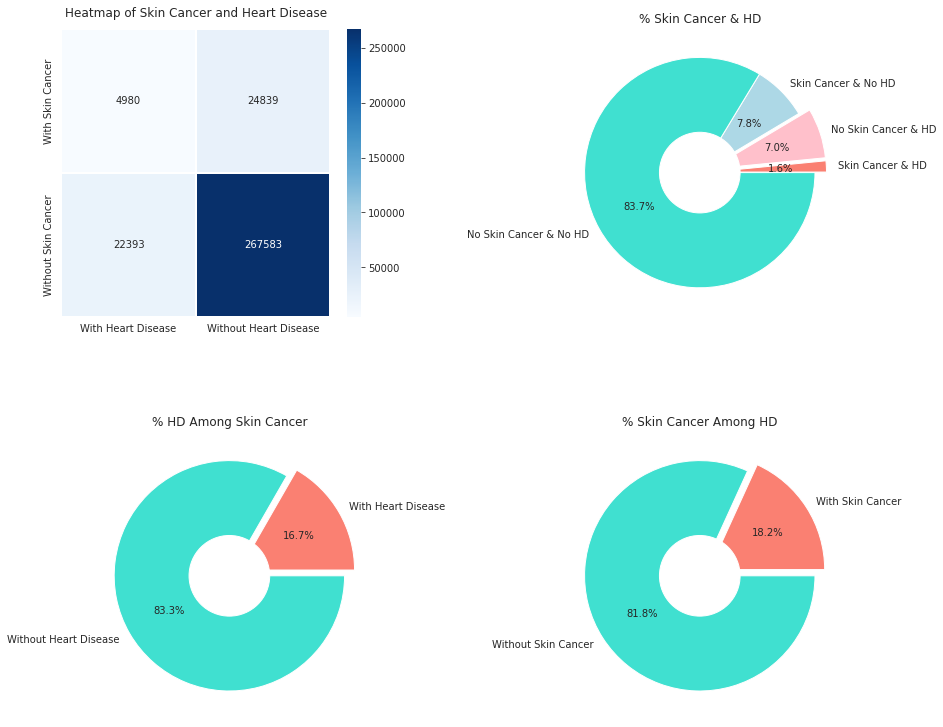

In [199]:
observ.binviz("SkinCancer", ["With Skin Cancer", "Without Skin Cancer"],
              "Heatmap of Skin Cancer and Heart Disease",
              ["Skin Cancer & HD",
               "No Skin Cancer & HD",
               "Skin Cancer & No HD",
               "No Skin Cancer & No HD"],
              don_all_title= "% Skin Cancer & HD",
              don_one_title= "% HD Among Skin Cancer",
              don_two_title= "% Skin Cancer Among HD")

In order to be able to apply `corr` method to the dataset,
we need to transform the non-numeric features into numeric ones.

In [200]:
# Feature Numeric Transformation:
trans_df = data_df.copy()

# 1. Features with "Yes"/"No" values
bin_val_cols = [col for col in data_df.columns
                if set(data_df[col]) == {"Yes", "No"}]
for col in bin_val_cols:
    num_val = []
    for val in data_df[col]:
        num_val.append(1) if val == "Yes" else num_val.append(0)
    trans_df[col] = num_val
    
# 2. Column "Sex"
# For "sex" column, we will label "Female" as 0 and "Male" as 1.
new_sex_vals = []
for fm in trans_df["Sex"]:
    new_sex_vals.append(0) if fm == "Female" else new_sex_vals.append(1)
trans_df["Sex"] = new_sex_vals

# 3. Multivalue Non-Ordered Features
def multi_non_ord(df, cols, add_names):
    for col, name in zip(cols, add_names):
        new_subcols_for_cols = sorted(list(df[col].unique()))
        for nsc in new_subcols_for_cols:
            nsc_vals = []
            for val in df[col]:
                nsc_vals.append(1) if val == nsc else nsc_vals.append(0)
            df[str(name) + str(nsc)] = nsc_vals
        df.drop(columns= [col], inplace= True)

multi_non_ord(trans_df, ["AgeCategory", "Race"], ["Age: ", "Race: "])

# 4. Column "Diabetic"
diab_new_cols = ["GenDiabetic", "Borderline Diabetic", "Pregnancy Diabetic"]
diab_params = ["Yes", "No, borderline diabetes", "Yes (during pregnancy)"]
for dnc, dp in zip(diab_new_cols, diab_params):
    diab_new_vals = []
    for val in trans_df["Diabetic"]:
        diab_new_vals.append(1) if val == dp else diab_new_vals.append(0)
    trans_df[dnc] = diab_new_vals
trans_df.drop(columns= ["Diabetic"], inplace= True)

# 5. Column "General Health Conditions"
gh_values = ["Poor", "Fair", "Good", "Very good", "Excellent"] # taken from the data
num_gh = list(range(1, len(gh_values) + 1))
gh_new_vals = []
for gh in trans_df["GenHealth"]:
    for ghv, ghvn in zip(gh_values, num_gh):
        if gh == ghv:
            gh_new_vals.append(ghvn)
trans_df["GenHealth"] = gh_new_vals

In [201]:
# The shape of the transformed data
print(f"The transformed data consists of {trans_df.shape[0]} rows and {trans_df.shape[1]} columns.")

# Descriptive statistics
trans_df.describe().T

The transformed data consists of 319795 rows and 37 columns.


,count,mean,std,min,25%,50%,75%,max
HeartDisease,319795.0,0.085595,0.279766,0.00,0.00,0.00,0.00,1.00
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
Smoking,319795.0,0.412477,0.492281,0.00,0.00,0.00,1.00,1.00
AlcoholDrinking,319795.0,0.068097,0.251912,0.00,0.00,0.00,0.00,1.00
Stroke,319795.0,0.037740,0.190567,0.00,0.00,0.00,0.00,1.00
PhysicalHealth,319795.0,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,319795.0,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
DiffWalking,319795.0,0.138870,0.345812,0.00,0.00,0.00,0.00,1.00
Sex,319795.0,0.475273,0.499389,0.00,0.00,0.00,1.00,1.00
PhysicalActivity,319795.0,0.775362,0.417344,0.00,1.00,1.00,1.00,1.00


Then the Pearson correlation between features is presented on the following heatmap.

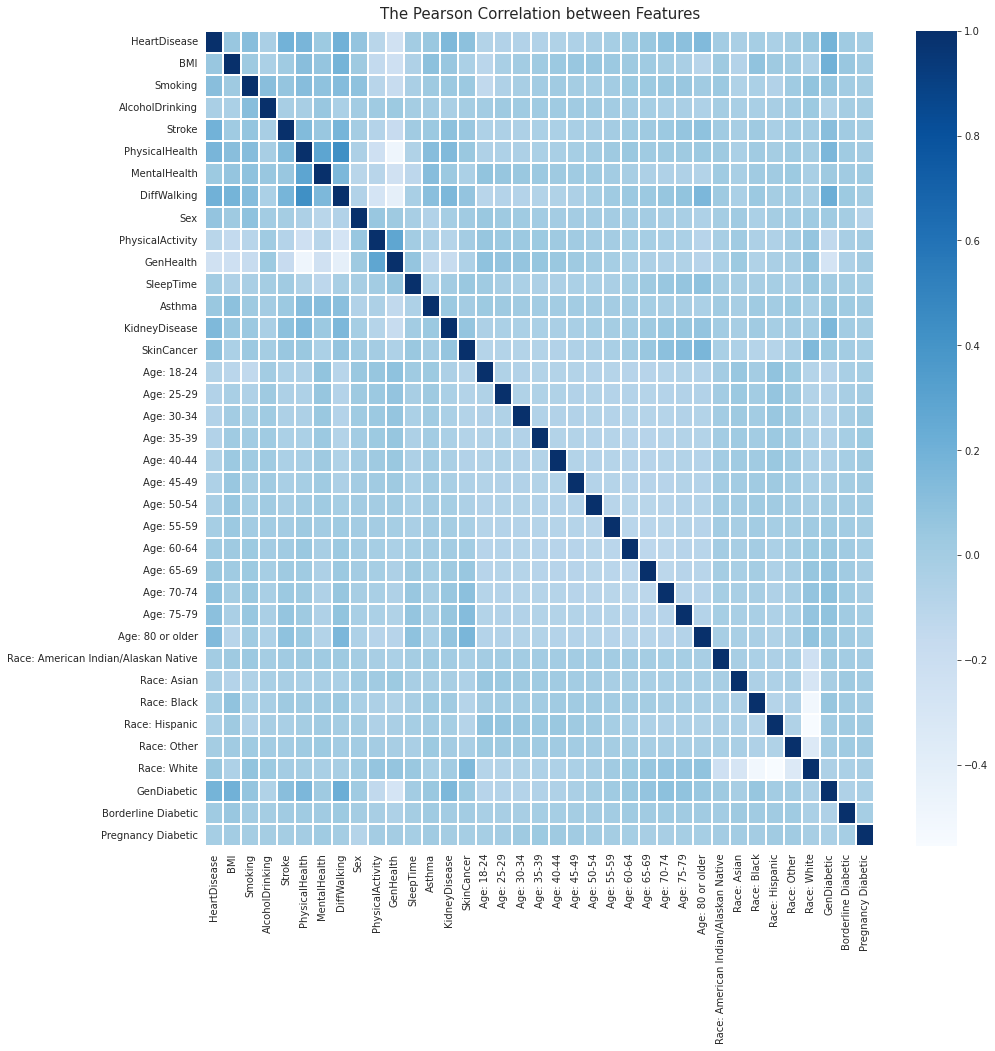

In [202]:
# Pearson Correlation between Features
data_corr = trans_df.corr()

corr_ft = plt.figure(figsize= (15, 15))
corr_ft = sns.heatmap(data_corr, linewidth= 0.1, cmap= "Blues")
corr_ft.set_title("The Pearson Correlation between Features",
                   fontsize= 15,
                   pad= 12)

plt.show()

Pearson correlation between each feature and `HeartDisease`
is given on the following chart.

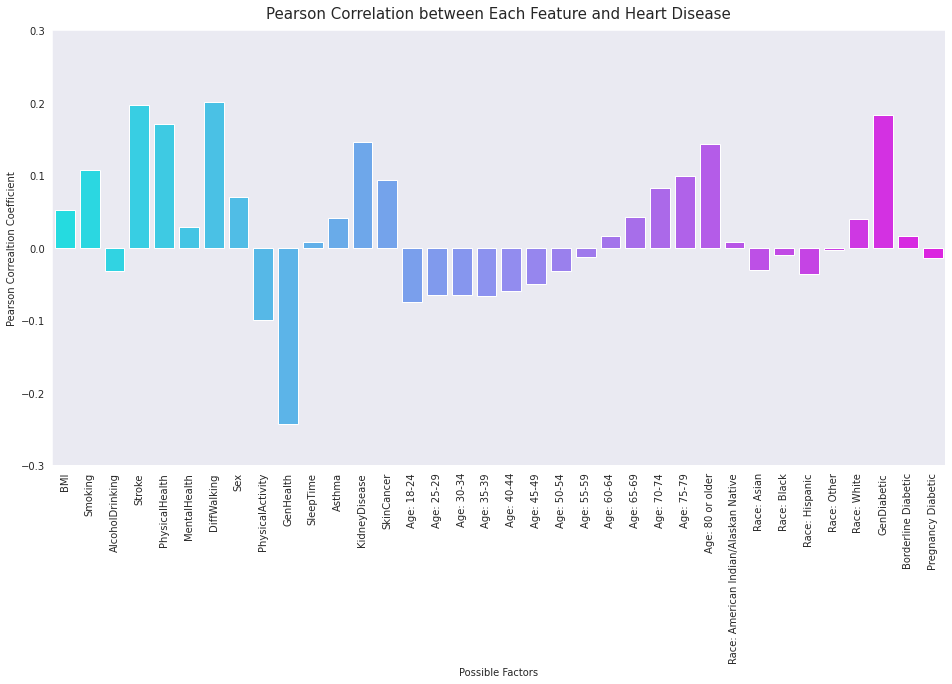

In [203]:
# Pearson Correlation between each feature and HeartDisease
corr_ft_hd_x = list(data_corr.columns)
del corr_ft_hd_x[0]
corr_ft_hd_y = list(data_corr["HeartDisease"])
del corr_ft_hd_y[0]

corr_ft_hd = plt.figure(figsize= (16, 8))
corr_ft_hd = sns.barplot(x= corr_ft_hd_x, y= corr_ft_hd_y, palette= "cool")
corr_ft_hd.set_title("Pearson Correlation between Each Feature and Heart Disease",
                     fontsize= 15, pad= 12)
corr_ft_hd.set(xlabel= "Possible Factors",
               ylabel= "Pearson Correaltion Coefficient",
               ylim= (-0.3, 0.3))
corr_ft_hd.set_xticklabels(corr_ft_hd_x, rotation= "vertical")

plt.show()

## 1.3. Interpretation and Conclusion

From the analysis we can infer the following conclusions:
<li>BMI contributes to heart disease.
    People with BMI less than 20 or greater than 25 tend to have a higher chance
    of getting heart disease.
<li>Smoking habits contributes to heart disease. On the other hand,
    the data shows that alcoholic drinking habits does not contribute to heart disease,
    which is quite counter-intuitive.
<li>Stroke contributes to heart disease.
<li>The number of physical health problems experienced within
    the past 30 days contributes to heart disease. On the other hand, the data
    shows that the number of mental health problems within the same interval only
    gives a small contribution to heart disease.
<li>People with difficulty walking tend to have a higher chance of
    getting heart disease.
<li>In terms of sexes, males tend to have a higher chance of heart disease
    than females.
<li>The number of physical activity other than working in the past 30 days decreases
    the chance of getting heart disease. The same conclusion applies for the general
    health conditions.
<li>The amount of sleep time in a day does not seem to give
    a considerable contribution to heart disease.
    However, people without heart disease commonly have a better sleep time,
    that is about 6 to 8 hours in a day.
<li>Asthma, kidney disease, skin cancer and diabetes contribute to heart disease.
    However, asthma only gives a small contribution.
<li>People older than 60 tend to have heart disease than those younger than 60.
<li>Race does not seem to have constributions to heart disease.
    People of any race could have heart disease.

# 2. Data Preprocessing:
## 2.1. Check the Null values

In [204]:
print(data_df.isnull().sum().sort_values(ascending=False))

HeartDisease        0
BMI                 0
KidneyDisease       0
Asthma              0
SleepTime           0
GenHealth           0
PhysicalActivity    0
Diabetic            0
Race                0
AgeCategory         0
Sex                 0
DiffWalking         0
MentalHealth        0
PhysicalHealth      0
Stroke              0
AlcoholDrinking     0
Smoking             0
SkinCancer          0
dtype: int64


There is  no null values

## 2.2. Encoding Categorical Data

In [205]:
from sklearn.preprocessing import LabelEncoder

In [206]:
# Extract the Categorical data
cat_df = data_df.select_dtypes(include=['object'])
cat_df.head(5)

,HeartDisease,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,No,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,No,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [207]:
# Create the encoder variable
encoder = LabelEncoder()

for i in cat_df:
    # fit the categoral feature to the encoding method
    data_df[i] = encoder.fit_transform(data_df[i])
    
# Check that the value transformed successfully 
data_df['Smoking'].value_counts()

0    187887
1    131908
Name: Smoking, dtype: int64

In [208]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

### Data Correlation & Distribution

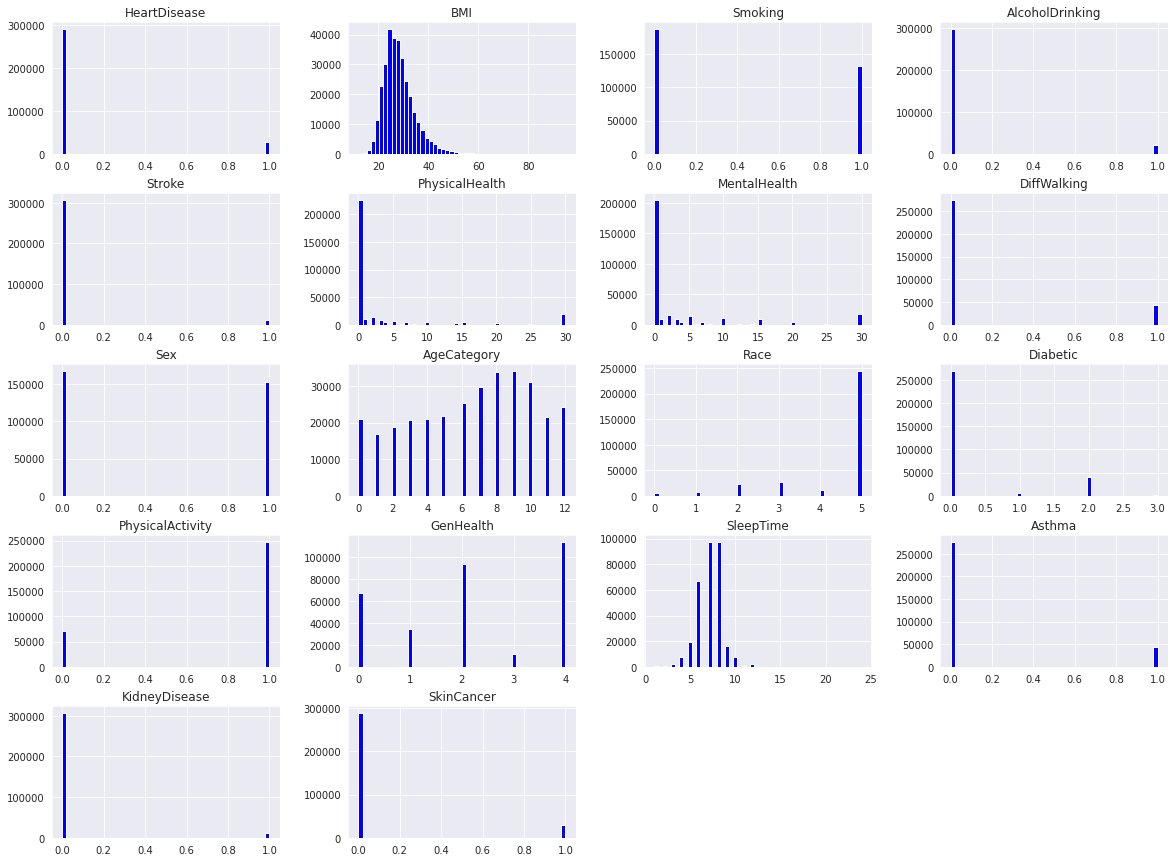

In [209]:
# Histogram
data_df.hist(bins=50, figsize=(20,15), color='b')
plt.show()

#### Correlation between the features:

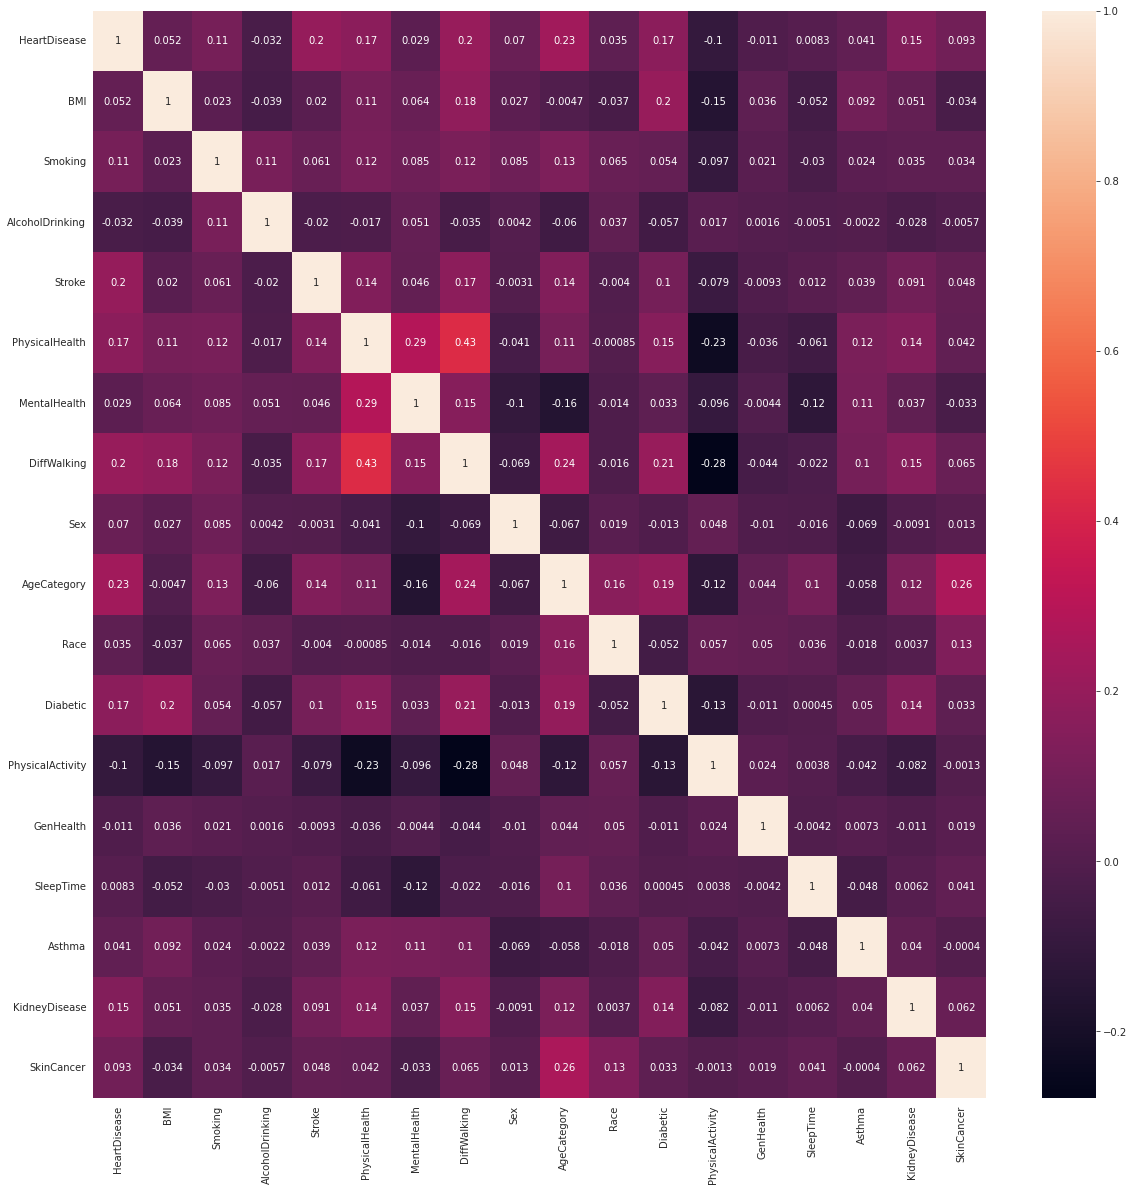

In [210]:
# Heatmap
corr_matrix = data_df.corr()
plt.figure(figsize = (20,20))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

#### Correlation between the features and the main target:

<AxesSubplot:>

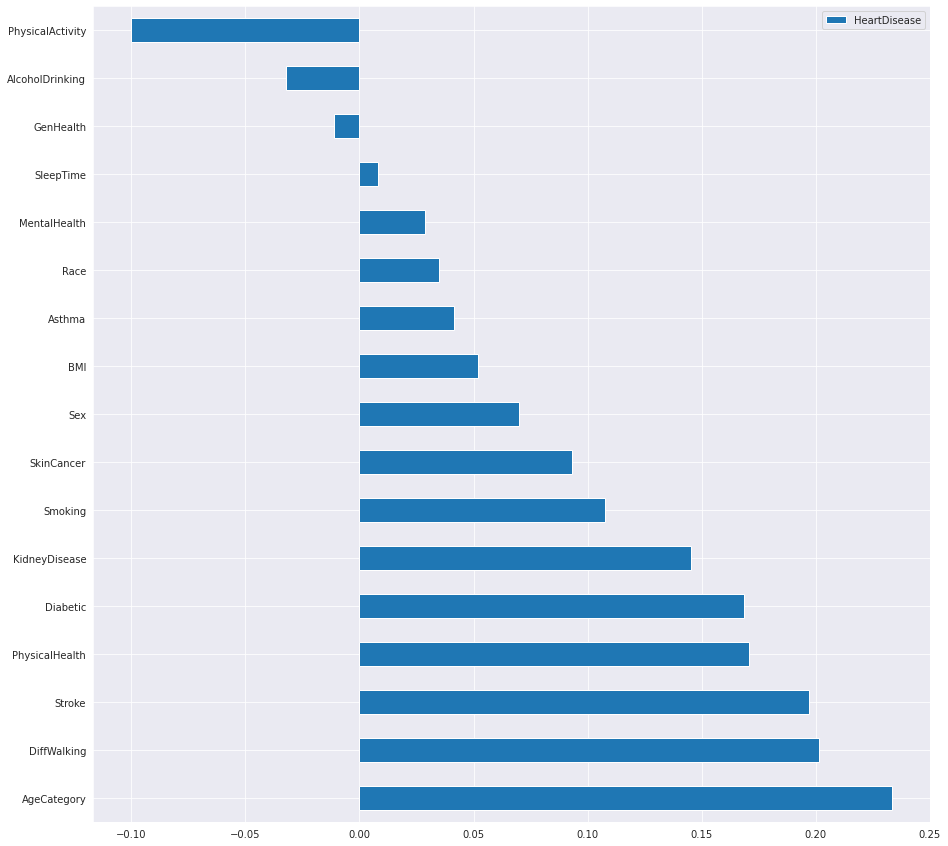

In [211]:
#Correlation check
corr = pd.DataFrame(data_df.corr()['HeartDisease']).drop('HeartDisease',axis=0).sort_values(by = 'HeartDisease',ascending=False)
corr.plot(kind='barh',grid=True,figsize=(15,15))

## 2.3. Removing unnecessary features

In [212]:
data_df.drop(['AlcoholDrinking','PhysicalActivity','GenHealth', 'SleepTime'],axis=1,inplace=True)
data_df.head(5)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,3.0,30.0,0,0,7,5,2,1,0,1
1,0,20.34,0,1,0.0,0.0,0,0,12,5,0,0,0,0
2,0,26.58,1,0,20.0,30.0,0,1,9,5,2,1,0,0
3,0,24.21,0,0,0.0,0.0,0,0,11,5,0,0,0,1
4,0,23.71,0,0,28.0,0.0,1,0,4,5,0,0,0,0


## 2.4 Outliers

HeartDisease         AxesSubplot(0.125,0.772143;0.168478x0.107857)
BMI               AxesSubplot(0.327174,0.772143;0.168478x0.107857)
Smoking           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
Stroke            AxesSubplot(0.731522,0.772143;0.168478x0.107857)
PhysicalHealth       AxesSubplot(0.125,0.642714;0.168478x0.107857)
MentalHealth      AxesSubplot(0.327174,0.642714;0.168478x0.107857)
DiffWalking       AxesSubplot(0.529348,0.642714;0.168478x0.107857)
Sex               AxesSubplot(0.731522,0.642714;0.168478x0.107857)
AgeCategory          AxesSubplot(0.125,0.513286;0.168478x0.107857)
Race              AxesSubplot(0.327174,0.513286;0.168478x0.107857)
Diabetic          AxesSubplot(0.529348,0.513286;0.168478x0.107857)
Asthma            AxesSubplot(0.731522,0.513286;0.168478x0.107857)
KidneyDisease        AxesSubplot(0.125,0.383857;0.168478x0.107857)
SkinCancer        AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype: object

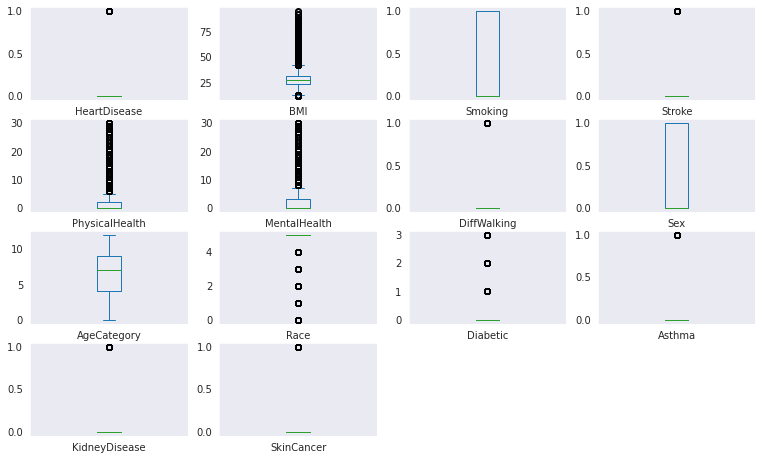

In [213]:
data_df.plot(kind="box", subplots=True, layout=(6,4), figsize=(13,12))

### Removing BMI Outliers

In [214]:
#Highest BMI record was for Jon Brower Minnoch with BMI of 105.3.
x=data_df[data_df['BMI']>100]
x.shape

(0, 14)

In [215]:
data_df=data_df[data_df['BMI']<=100]
data_df.head(1)

,HeartDisease,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
0,0,16.6,1,0,3.0,30.0,0,0,7,5,2,1,0,1


In [216]:
print('The Average of data Features according to the target:')
data_df.groupby('HeartDisease').mean()

The Average of data Features according to the target:


,BMI,Smoking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,Asthma,KidneyDisease,SkinCancer
HeartDisease,,,,,,,,,,,,,
0,28.224658,0.396246,0.026263,2.956416,3.828778,0.117577,0.464572,6.259943,4.383815,0.263438,0.129741,0.028466,0.084942
1,29.401592,0.585869,0.160340,7.808242,4.641764,0.366346,0.589596,9.234318,4.534834,0.695101,0.180214,0.126219,0.181931


### Removing PhysicalHealth Outliers 

<AxesSubplot:xlabel='PhysicalHealth'>

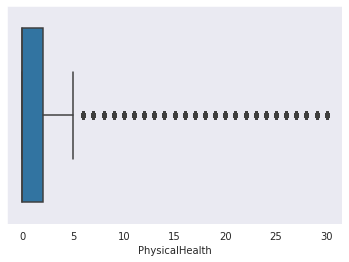

In [217]:
sns.boxplot(x = data_df['PhysicalHealth'])

In [218]:
Q1 = data_df.PhysicalHealth.quantile(0.25)
Q3 = data_df.PhysicalHealth.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

2.0


In [219]:
data = data_df[~((data_df.PhysicalHealth < (Q1 - 1.5 * IQR)) | (data_df.PhysicalHealth > (Q3 + 1.5 * IQR)))]

<AxesSubplot:xlabel='PhysicalHealth'>

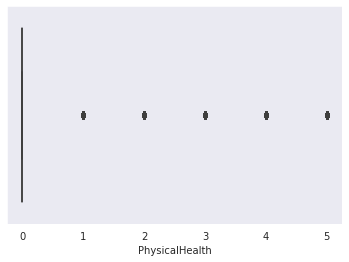

In [220]:
sns.boxplot(x = data['PhysicalHealth'])

### Removing MentalHealth outliers 

<AxesSubplot:xlabel='MentalHealth'>

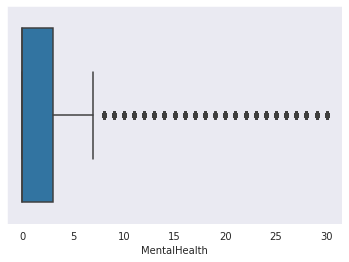

In [221]:
sns.boxplot(x = data_df['MentalHealth'])

In [222]:
data['MentalHealth'].value_counts()

0.0     184674
2.0      14531
5.0      11806
30.0      9508
3.0       9077
1.0       8482
10.0      8001
15.0      6977
4.0       4660
7.0       4582
20.0      3470
14.0      1412
25.0      1217
6.0       1213
8.0        880
12.0       546
28.0       335
21.0       211
29.0       202
9.0        147
18.0       144
16.0        93
17.0        83
13.0        81
27.0        80
22.0        57
11.0        56
23.0        45
24.0        40
26.0        27
19.0        12
Name: MentalHealth, dtype: int64

In [223]:
Q1 = data_df.MentalHealth.quantile(0.25)
Q3 = data_df.MentalHealth.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

3.0


In [224]:
data = data_df[~((data_df.MentalHealth < (Q1 - 1.5 * IQR)) | (data_df.MentalHealth > (Q3 + 1.5 * IQR)))]

<AxesSubplot:xlabel='MentalHealth'>

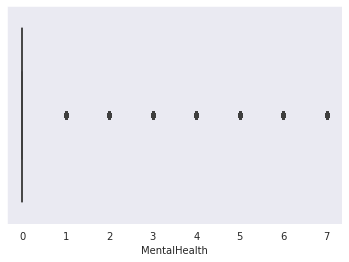

In [225]:
sns.boxplot(x = data['MentalHealth'])

<AxesSubplot:xlabel='BMI'>

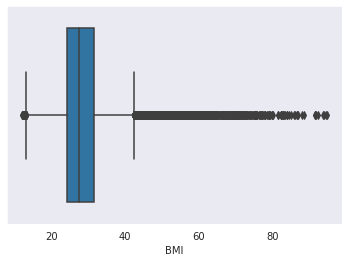

In [226]:
sns.boxplot(x = data_df['BMI'])

In [227]:
Q1 = data_df.BMI.quantile(0.25)
Q3 = data_df.BMI.quantile(0.75)
IQR = Q3 - Q1 
print(IQR)

7.390000000000001


In [228]:
data = data_df[~((data_df.BMI < (Q1 - 1.5 * IQR)) | (data_df.BMI > (Q3 + 1.5 * IQR)))]

<AxesSubplot:xlabel='BMI'>

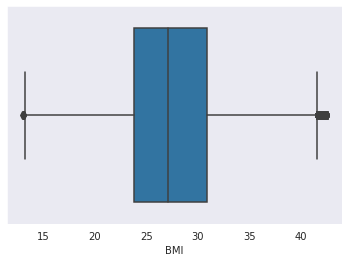

In [229]:
sns.boxplot(x = data['BMI'])

# 3. Modeling:

## 3.1. Data Splitting

In [230]:
X = data_df.drop('HeartDisease',axis=1).values
y = data_df['HeartDisease'].values
print(f' X_shape: {X.shape} \n y_shape: {y.shape}')

 X_shape: (319795, 13) 
 y_shape: (319795,)


## 3.2. Handling The imbalanced data

In [231]:
X.shape , y.shape

((319795, 13), (319795,))

### 3.2.1. NM Under-Sampling to deal with Imbalanced Data

In [232]:
from imblearn.under_sampling  import NearMiss

In [233]:
# define the undersampling method
under_nm_sample1 = NearMiss(version=3 , n_neighbors_ver3=3)
# under_nm_sample = NearMiss(random_state = 42)

In [234]:
X_nm , y_nm = under_nm_sample1.fit_resample(X, y)

In [235]:
X_nm.shape , y_nm.shape

((54746, 13), (54746,))

### 3.2.2. Random Under-Sampling to deal with Imbalanced Data

In [236]:
from imblearn.under_sampling  import RandomUnderSampler

In [237]:
smoteUnder = RandomUnderSampler(sampling_strategy=1)

In [238]:
X_rus, y_rus = smoteUnder.fit_resample(X,y)

In [239]:
print(f' X_shape: {X_rus.shape} \n y_shape: {y_rus.shape}')

 X_shape: (54746, 13) 
 y_shape: (54746,)


### 3.2.3. Random Over-Sampling to deal with Imbalanced Data

In [240]:
from imblearn.over_sampling  import RandomOverSampler

In [241]:
smoteOver = RandomOverSampler(sampling_strategy=1)

In [242]:
X_smoteOver, y_smoteOver = smoteOver.fit_resample(X,y)

In [243]:
print(f' X_shape: {X_smoteOver.shape} \n y_shape: {y_smoteOver.shape}')

 X_shape: (584844, 13) 
 y_shape: (584844,)


### 3.2.4. Smote OverSampling:

In [244]:
from imblearn.over_sampling  import SMOTE

In [245]:
smote = SMOTE(random_state=42)

In [246]:
X_smote, y_smote = smote.fit_resample(X,y)

In [247]:
print(f' X_shape: {X_smote.shape} \n y_shape: {y_smote.shape}')

 X_shape: (584844, 13) 
 y_shape: (584844,)


## 3.3. Data Standardization

In [248]:
from sklearn.preprocessing import StandardScaler

scl = StandardScaler()

In [249]:
# Without sampling
X = scl.fit_transform(X)

In [250]:
# with Random Oversampling
X_smoteOver = scl.fit_transform(X_smoteOver)

In [251]:
# with Near Miss undersampling
X_nm = scl.fit_transform(X_nm)

In [252]:
# with Random Undersampling
X_rus = scl.fit_transform(X_rus)

In [253]:
# with Smote Oversampling
X_smote = scl.fit_transform(X_smote)

## 3.4. Data Splitting

In [254]:
# Without Sampling:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=0)
print(f' X_train: {X_train.shape} & X_test: {X_test.shape}')
print(f' y_train: {y_train.shape} & y_test: {y_test.shape}')

 X_train: (255836, 13) & X_test: (63959, 13)
 y_train: (255836,) & y_test: (63959,)


In [255]:
# with NearMiss UnderSampling:
from sklearn.model_selection import train_test_split
X_train_nm, X_test_nm, y_train_nm, y_test_nm = train_test_split(X_nm, y_nm ,test_size=0.2, shuffle=True, random_state=0)
print(f' X_train: {X_train_nm.shape} & X_test: {X_test_nm.shape}')
print(f' y_train: {y_train_nm.shape} & y_test: {y_test_nm.shape}')

 X_train: (43796, 13) & X_test: (10950, 13)
 y_train: (43796,) & y_test: (10950,)


In [256]:
# with RandomUnderSampling:
from sklearn.model_selection import train_test_split
X_train_rus, X_test_rus, y_train_rus, y_test_rus = train_test_split(X_rus, y_rus ,test_size=0.2, shuffle=True, random_state=0)
print(f' X_train: {X_train_rus.shape} & X_test: {X_test_rus.shape}')
print(f' y_train: {y_train_rus.shape} & y_test: {y_test_rus.shape}')

 X_train: (43796, 13) & X_test: (10950, 13)
 y_train: (43796,) & y_test: (10950,)


In [257]:
# With Random Oversampling
from sklearn.model_selection import train_test_split
X_train_res, X_test_res, y_train_res, y_test_res = train_test_split(X_smoteOver,y_smoteOver,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_res.shape} & X_test: {X_test_res.shape}')
print(f' y_train: {y_train_res.shape} & y_test: {y_test_res.shape}')

 X_train: (467875, 13) & X_test: (116969, 13)
 y_train: (467875,) & y_test: (116969,)


In [258]:
# with Smote
from sklearn.model_selection import train_test_split
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote,y_smote,test_size=0.20,shuffle=True,random_state=0)
print(f' X_train: {X_train_smote.shape} & X_test: {X_test_smote.shape}')
print(f' y_train: {y_train_smote.shape} & y_test: {y_test_smote.shape}')

 X_train: (467875, 13) & X_test: (116969, 13)
 y_train: (467875,) & y_test: (116969,)


## 3.5. Modeling Evaluation Functions

In [259]:
# Evaluation imports:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [260]:
# Function to plot the confusion matrix:
def cmatrix_fun(model_name, actual, predicted, color):
    # check the confusion matrix
    cm = confusion_matrix(actual, predicted) 
    print(cm)

    # Plot the CM
    ax = sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap=color)

    ax.set_title(f'The confusion matrix using {model_name} Classifier \n\n');
    ax.set_xlabel('\nPredicted Values')
    ax.set_ylabel('Actual Values ');

    # Ticket labels - List must be in alphabetical order
    ax.xaxis.set_ticklabels(['False','True'])
    ax.yaxis.set_ticklabels(['False','True'])


In [261]:
# Function to check the classification report
def classification_report_fun(model_name, actual, predicted):
    print(f'The Classification Report for {model_name} Classifier:')
    print(classification_report(actual, predicted))

## 3.6. Modeling Evaluation Functions

### 1. RandomForest Classifier

##### Before Sampling:

In [262]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


rf_clf = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters before oversampling:
rf_clf.fit(X_train, y_train)

# Predict
y_pred_test = rf_clf.predict(X_test)
y_pred_train = rf_clf.predict(X_train)

##### After NearMiss Undersampling:

In [263]:
rf_clf_nm = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_nm.fit(X_train_nm, y_train_nm)

#predict
y_pred_test_nm = rf_clf_nm.predict(X_test_nm)
y_pred_train_nm = rf_clf_nm.predict(X_train_nm)

##### After Random Undersampling:

In [264]:
rf_clf_rus = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_rus.fit(X_train_rus, y_train_rus)

#predict
y_pred_test_rus = rf_clf_rus.predict(X_test_rus)
y_pred_train_rus = rf_clf_rus.predict(X_train_rus)

##### After Random Oversampling:

In [265]:
rf_clf_res = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_res.fit(X_train_res, y_train_res)

#predict
y_pred_test_res = rf_clf_res.predict(X_test_res)
y_pred_train_res = rf_clf_res.predict(X_train_res)

##### After Random Oversampling:

In [266]:
rf_clf_smote = RandomForestClassifier(criterion='entropy',n_estimators=20)

# Fit the parameters After oversampling:
rf_clf_smote.fit(X_train_smote, y_train_smote)

#predict
y_pred_test_smote = rf_clf_smote.predict(X_test_smote)
y_pred_train_smote = rf_clf_smote.predict(X_train_smote)

##### Evaluation:

In [267]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train, y_pred_train)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test,y_pred_test)*100))
print('********************************************************')
print('Accuracy of Train after NearMiss Undersampling: {}'.format(accuracy_score(y_train_nm,y_pred_train_nm)*100))
print('Accuracy of Test after NearMiss Undersampling: {}'.format(accuracy_score(y_test_nm,y_pred_test_nm)*100))
print('********************************************************')
print('Accuracy of Train after RandomUndersampling: {}'.format(accuracy_score(y_train_rus,y_pred_train_rus)*100))
print('Accuracy of Test after RandomUndersampling: {}'.format(accuracy_score(y_test_rus,y_pred_test_rus)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res,y_pred_train_res)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res,y_pred_test_res)*100))
print('********************************************************')
print('Accuracy of Train after Smote Oversampling: {}'.format(accuracy_score(y_train_smote,y_pred_train_smote)*100))
print('Accuracy of Test after Smote Oversampling: {}'.format(accuracy_score(y_test_smote,y_pred_test_smote)*100))

Accuracy of Train before sampling: 98.07220250472959
Accuracy of  Test before sampling: 89.83723948154287
********************************************************
Accuracy of Train after NearMiss Undersampling: 99.3264225043383
Accuracy of Test after NearMiss Undersampling: 69.3972602739726
********************************************************
Accuracy of Train after RandomUndersampling: 96.9198100283131
Accuracy of Test after RandomUndersampling: 70.8310502283105
********************************************************
Accuracy of Train after Random Oversampling: 96.9015228426396
Accuracy of Test after Random Oversampling: 93.77783857261326
********************************************************
Accuracy of Train after Smote Oversampling: 98.38354261287738
Accuracy of Test after Smote Oversampling: 91.17800442852379


##### It is clear that there is overfitting in the data modeling before sampling and by using underfitting -> overfitting increases, so we will use Oversampling for the data set In RF Classifier

[[52215  6246]
 [ 1032 57476]]


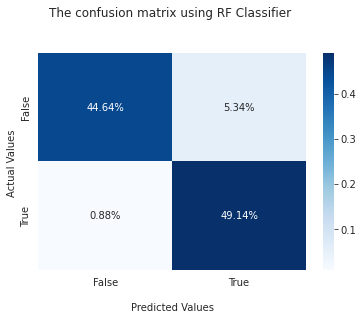

In [268]:
cmatrix_fun('RF', y_test_res, y_pred_test_res, 'Blues')

In [269]:
classification_report_fun('RF', y_test_res, y_pred_test_res)

The Classification Report for RF Classifier:
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     58461
           1       0.90      0.98      0.94     58508

    accuracy                           0.94    116969
   macro avg       0.94      0.94      0.94    116969
weighted avg       0.94      0.94      0.94    116969



In [270]:
rf_model = pd.DataFrame({"Y_test": y_test_res, "Y_pred" : y_pred_test_res})
rf_model.head(10)

,Y_test,Y_pred
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,1,1
6,1,1
7,0,0
8,1,1
9,0,0


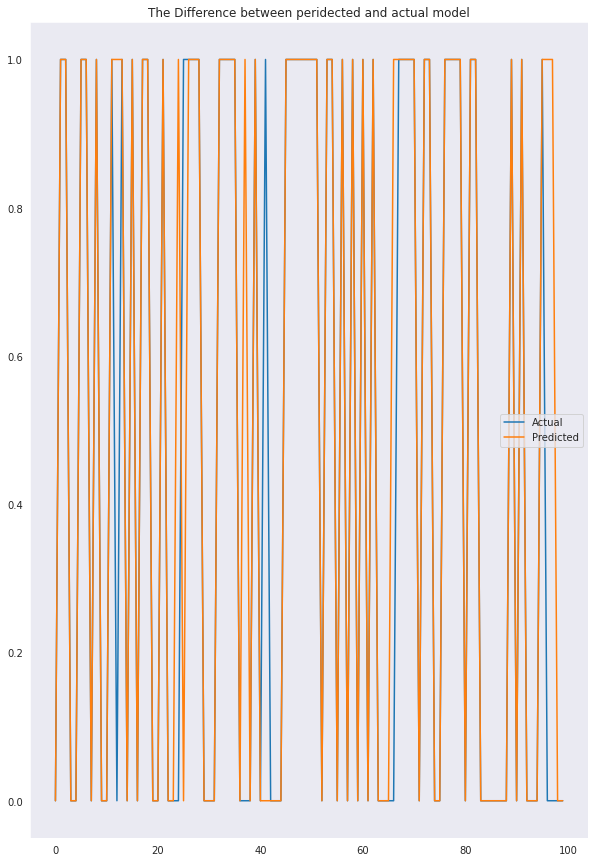

In [271]:
plt.figure(figsize=(10,15))
plt.title('The Difference between peridected and actual model')
plt.plot(rf_model[:100])
plt.legend(["Actual" , "Predicted"])

### 3.1.1 Applying k-Fold Cross Validation
The overall aim of Cross-Validation is to use it as a tool to evaluate machine learning models, by training a number of models on different subsets of the input data. 

Cross-validation can be used to detect overfitting in a model which infers that the model is not effectively generalizing patterns and similarities in the new inputted data.

In [275]:
rf_clf_results = cross_val_score(estimator = rf_clf, X = X_train, y = y_train, cv = 5)
rf_clf_results_res = cross_val_score(estimator = rf_clf_res, X = X_train_res, y = y_train_res, cv = 5)

rf_clf_pred = rf_clf.predict(X_test)
rf_clf_res_pred = rf_clf_res.predict(X_test_res)


print("Validation score before Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results.mean()*100.0, rf_clf_results.std()*100.0))
print("Validation score after Oversampling: %.5f%% (%.5f%%)" % (rf_clf_results_res.mean()*100.0, rf_clf_results_res.std()*100.0))
print('********************************************************')

print('Accuracy score of Test  befor Oversampling: {}'.format(accuracy_score(y_test,rf_clf_pred)*100))
print('Accuracy score of Test after Oversampling: {}'.format(accuracy_score(y_test_res,rf_clf_res_pred)*100))

Validation score before Oversampling: 89.74421% (0.07122%)
Validation score after Oversampling: 92.83249% (0.07203%)
********************************************************
Accuracy score of Test  befor Oversampling: 89.83723948154287
Accuracy score of Test after Oversampling: 93.77783857261326


### 2. KNN Classifier

In [278]:
from sklearn.neighbors import KNeighborsClassifier

# Applying KNeighborsClassifier Model 
KNNClassifierModel = KNeighborsClassifier(n_neighbors = 6)

In [279]:
# Without Sampling
KNNClassifierModel.fit(X_train, y_train)

#predict
y_pred_test_knn = KNNClassifierModel.predict(X_test)
y_pred_train_knn = KNNClassifierModel.predict(X_train)

In [280]:
# with NearMiss undersampling
KNNClassifierModel.fit(X_train_nm, y_train_nm)

#predict
y_pred_test_nm_knn = KNNClassifierModel.predict(X_test_nm)
y_pred_train_nm_knn = KNNClassifierModel.predict(X_train_nm)

In [281]:
# Fit the parameters After Random undersampling:
KNNClassifierModel.fit(X_train_rus, y_train_rus)

#predict
y_pred_test_rus_knn = KNNClassifierModel.predict(X_test_rus)
y_pred_train_rus_knn = KNNClassifierModel.predict(X_train_rus)

In [282]:
# With Random Oversampling
KNNClassifierModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_knn = KNNClassifierModel.predict(X_test_res)
y_pred_train_res_knn = KNNClassifierModel.predict(X_train_res)

In [283]:
# With Smote Oversampling
KNNClassifierModel.fit(X_train_smote, y_train_smote)

#predict
y_pred_test_smote_knn = KNNClassifierModel.predict(X_test_smote)
y_pred_train_smote_knn = KNNClassifierModel.predict(X_train_smote)

In [284]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_knn)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_knn)*100))
print('********************************************************')
print('Accuracy of Train after NearMiss Undersampling: {}'.format(accuracy_score(y_train_nm , y_pred_train_nm_knn)*100))
print('Accuracy of Test after NearMiss Undersampling: {}'.format(accuracy_score(y_test_nm, y_pred_test_nm_knn)*100))
print('********************************************************')
print('Accuracy of Train after Random Undersampling: {}'.format(accuracy_score(y_train_rus , y_pred_train_rus_knn)*100))
print('Accuracy of Test after Random Undersampling: {}'.format(accuracy_score(y_test_rus , y_pred_test_rus_knn)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_knn)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_knn)*100))
print('********************************************************')
print('Accuracy of Train after Smote Oversampling: {}'.format(accuracy_score(y_train_smote , y_pred_train_smote_knn)*100))
print('Accuracy of Test after Smote Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_smote_knn)*100))

Accuracy of Train before sampling: 92.11135258524993
Accuracy of  Test before sampling: 91.28191497678199
********************************************************
Accuracy of Train after NearMiss Undersampling: 76.8335007763266
Accuracy of Test after NearMiss Undersampling: 68.72146118721462
********************************************************
Accuracy of Train after Random Undersampling: 78.68983468809937
Accuracy of Test after Random Undersampling: 71.3607305936073
********************************************************
Accuracy of Train after Random Oversampling: 90.43911301095378
Accuracy of Test after Random Oversampling: 87.63946002787063
********************************************************
Accuracy of Train after Smote Oversampling: 90.12086561581619
Accuracy of Test after Smote Oversampling: 86.19976233019005


[[57968   544]
 [ 5032   415]]


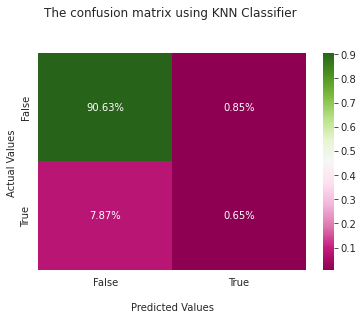

In [285]:
cmatrix_fun('KNN', y_test, y_pred_test_knn,'PiYG')

In [286]:
classification_report_fun("KNN", y_test, y_pred_test_knn)

The Classification Report for KNN Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95     58512
           1       0.43      0.08      0.13      5447

    accuracy                           0.91     63959
   macro avg       0.68      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959



### 3. Logistic Regression 

In [287]:
# import
from sklearn.linear_model import LogisticRegression

# Applying LogisticRegression Model 
LogisticRegressionModel = LogisticRegression(penalty = 'l2', solver = 'sag', C = 1, random_state = 33)

In [288]:
# Without Sampling
LogisticRegressionModel.fit(X_train, y_train)

#predict
y_pred_test_lr = LogisticRegressionModel.predict(X_test)
y_pred_train_lr = LogisticRegressionModel.predict(X_train)

In [289]:
# with NearMiss undersampling
LogisticRegressionModel.fit(X_train_nm, y_train_nm)

#predict
y_pred_test_nm_lr = LogisticRegressionModel.predict(X_test_nm)
y_pred_train_nm_lr = LogisticRegressionModel.predict(X_train_nm)

In [290]:
# With Random Undersampling:
LogisticRegressionModel.fit(X_train_rus, y_train_rus)

#predict
y_pred_test_rus_lr = LogisticRegressionModel.predict(X_test_rus)
y_pred_train_rus_lr = LogisticRegressionModel.predict(X_train_rus)

In [291]:
# With Random Oversampling
LogisticRegressionModel.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_lr = LogisticRegressionModel.predict(X_test_res)
y_pred_train_res_lr = LogisticRegressionModel.predict(X_train_res)

In [292]:
# With Smote Oversampling
LogisticRegressionModel.fit(X_train_smote, y_train_smote)

#predict
y_pred_test_smote_lr = LogisticRegressionModel.predict(X_test_smote)
y_pred_train_smote_lr = LogisticRegressionModel.predict(X_train_smote)

In [293]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_lr)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_lr)*100))
print('********************************************************')
print('Accuracy of Train after NearMiss Undersampling: {}'.format(accuracy_score(y_train_nm , y_pred_train_nm_lr)*100))
print('Accuracy of Test after NearMiss Undersampling: {}'.format(accuracy_score(y_test_nm, y_pred_test_nm_lr)*100))
print('********************************************************')
print('Accuracy of Train after Random Undersampling: {}'.format(accuracy_score(y_train_rus , y_pred_train_rus_lr)*100))
print('Accuracy of Test after Random Undersampling: {}'.format(accuracy_score(y_test_rus , y_pred_test_rus_lr)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_lr)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_lr)*100))
print('********************************************************')
print('Accuracy of Train after Smote Oversampling: {}'.format(accuracy_score(y_train_smote , y_pred_train_smote_lr)*100))
print('Accuracy of Test after Smote Oversampling: {}'.format(accuracy_score(y_test_smote , y_pred_test_smote_lr)*100))

Accuracy of Train before sampling: 91.50588658359261
Accuracy of  Test before sampling: 91.50080520333339
********************************************************
Accuracy of Train after NearMiss Undersampling: 67.04950223764727
Accuracy of Test after NearMiss Undersampling: 67.34246575342466
********************************************************
Accuracy of Train after Random Undersampling: 75.20778153256005
Accuracy of Test after Random Undersampling: 75.57077625570776
********************************************************
Accuracy of Train after Random Oversampling: 75.22201442693027
Accuracy of Test after Random Oversampling: 75.09596559772247
********************************************************
Accuracy of Train after Smote Oversampling: 75.25471546887523
Accuracy of Test after Smote Oversampling: 75.20283151946242


[[58044   468]
 [ 4968   479]]


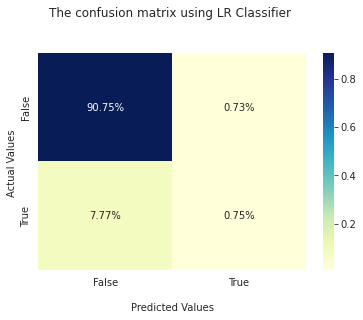

In [294]:
cmatrix_fun('LR', y_test, y_pred_test_lr, 'YlGnBu')

In [295]:
classification_report_fun("LR", y_test, y_pred_test_lr)

The Classification Report for LR Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.51      0.09      0.15      5447

    accuracy                           0.92     63959
   macro avg       0.71      0.54      0.55     63959
weighted avg       0.89      0.92      0.89     63959



## 3.4 XGB:

In [296]:
from xgboost import XGBClassifier

xgb = XGBClassifier()

In [297]:
# Without Sampling
xgb.fit(X_train, y_train)

#predict
y_pred_test_xgb = xgb.predict(X_test)
y_pred_train_xgb = xgb.predict(X_train)

In [298]:
# with NearMiss undersampling
xgb.fit(X_train_nm, y_train_nm)

#predict
y_pred_test_nm_xgb = xgb.predict(X_test_nm)
y_pred_train_nm_xgb = xgb.predict(X_train_nm)

In [299]:
# With Random Undersampling:
xgb.fit(X_train_rus, y_train_rus)

#predict
y_pred_test_rus_xgb = xgb.predict(X_test_rus)
y_pred_train_rus_xgb = xgb.predict(X_train_rus)

In [300]:
# With Random Oversampling
xgb.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_xgb = xgb.predict(X_test_res)
y_pred_train_res_xgb = xgb.predict(X_train_res)

In [301]:
# With Smote Oversampling
xgb.fit(X_train_smote, y_train_smote)

#predict
y_pred_test_smote_xgb = xgb.predict(X_test_smote)
y_pred_train_smote_xgb = xgb.predict(X_train_smote)

In [302]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_xgb)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_xgb)*100))
print('********************************************************')
print('Accuracy of Train after NearMiss Undersampling: {}'.format(accuracy_score(y_train_nm , y_pred_train_nm_xgb)*100))
print('Accuracy of Test after NearMiss Undersampling: {}'.format(accuracy_score(y_test_nm, y_pred_test_nm_xgb)*100))
print('********************************************************')
print('Accuracy of Train after Random Undersampling: {}'.format(accuracy_score(y_train_rus , y_pred_train_rus_xgb)*100))
print('Accuracy of Test after Random Undersampling: {}'.format(accuracy_score(y_test_rus , y_pred_test_rus_xgb)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_xgb)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_xgb)*100))
print('********************************************************')
print('Accuracy of Train after Smote Oversampling: {}'.format(accuracy_score(y_train_smote , y_pred_train_smote_xgb)*100))
print('Accuracy of Test after Smote Oversampling: {}'.format(accuracy_score(y_test_smote , y_pred_test_smote_xgb)*100))

Accuracy of Train before sampling: 91.97220094122798
Accuracy of  Test before sampling: 91.52113072437031
********************************************************
Accuracy of Train after NearMiss Undersampling: 78.35190428349621
Accuracy of Test after NearMiss Undersampling: 71.76255707762557
********************************************************
Accuracy of Train after Random Undersampling: 79.03689834688099
Accuracy of Test after Random Undersampling: 75.04109589041096
********************************************************
Accuracy of Train after Random Oversampling: 77.49163772375101
Accuracy of Test after Random Oversampling: 77.07341261359848
********************************************************
Accuracy of Train after Smote Oversampling: 89.57841303767032
Accuracy of Test after Smote Oversampling: 89.29545435115287


[[58124   388]
 [ 5035   412]]


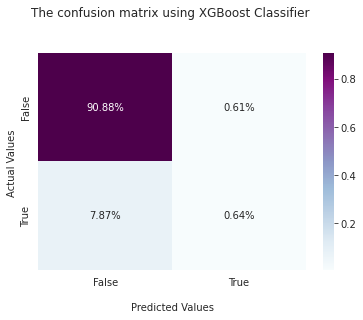

In [303]:
cmatrix_fun("XGBoost", y_test, y_pred_test_xgb, 'BuPu')

In [304]:
classification_report_fun("XGBoost", y_test, y_pred_test_xgb)

The Classification Report for XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     58512
           1       0.52      0.08      0.13      5447

    accuracy                           0.92     63959
   macro avg       0.72      0.53      0.54     63959
weighted avg       0.89      0.92      0.89     63959



## 3.4 Voting:

In [305]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier

In [306]:
# specify the used classifiers
clf1 = LogisticRegression()
# it is better to use odd number pf khiebours
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = XGBClassifier(max_depth = 5 , learning_rate = 0.3 , objective = 'binary:logistic' , n_estimators= 5, random_state=42)
clf4 = RandomForestClassifier(n_estimators=3 , max_depth=6  , max_features=4)
clf5 = AdaBoostClassifier(n_estimators=100, base_estimator= None,learning_rate=1, random_state = 1)

# Fit the classifier into hard voting model
v_clf = VotingClassifier(estimators=[("LogisticRegression" , clf1) , ('KNeighborsClassifier' , clf2) , ("XGBClassifier" , clf3) ,("RandomForestClassifier" , clf4), ("AdaBoost" , clf5)] , voting = "hard")

In [307]:
# Without Sampling
v_clf.fit(X_train, y_train)

#predict
y_pred_test_v_clf = v_clf.predict(X_test)
y_pred_train_v_clf = v_clf.predict(X_train)

In [308]:
# With Random Undersampling:
v_clf.fit(X_train_rus, y_train_rus)

#predict
y_pred_test_rus_v_clf = v_clf.predict(X_test_rus)
y_pred_train_rus_v_clf = v_clf.predict(X_train_rus)

In [309]:
# With Random Oversampling
v_clf.fit(X_train_res, y_train_res)

#predict
y_pred_test_res_v_clf = v_clf.predict(X_test_res)
y_pred_train_res_v_clf = v_clf.predict(X_train_res)

In [310]:
# With Smote Oversampling
v_clf.fit(X_train_smote, y_train_smote)

#predict
y_pred_test_smote_v_clf = v_clf.predict(X_test_smote)
y_pred_train_smote_v_clf = v_clf.predict(X_train_smote)

In [311]:
print('Accuracy of Train before sampling: {}'.format(accuracy_score(y_train , y_pred_train_v_clf)*100))
print('Accuracy of  Test before sampling: {}'.format(accuracy_score(y_test , y_pred_test_v_clf)*100))
print('********************************************************')
print('Accuracy of Train after Random Undersampling: {}'.format(accuracy_score(y_train_rus , y_pred_train_rus_v_clf)*100))
print('Accuracy of Test after Random Undersampling: {}'.format(accuracy_score(y_test_rus , y_pred_test_rus_v_clf)*100))
print('********************************************************')
print('Accuracy of Train after Random Oversampling: {}'.format(accuracy_score(y_train_res , y_pred_train_res_v_clf)*100))
print('Accuracy of Test after Random Oversampling: {}'.format(accuracy_score(y_test_res , y_pred_test_res_v_clf)*100))
print('********************************************************')
print('Accuracy of Train after Smote Oversampling: {}'.format(accuracy_score(y_train_smote , y_pred_train_smote_v_clf)*100))
print('Accuracy of Test after Smote Oversampling: {}'.format(accuracy_score(y_test_smote , y_pred_test_smote_v_clf)*100))

Accuracy of Train before sampling: 91.72321330852577
Accuracy of  Test before sampling: 91.5852342907175
********************************************************
Accuracy of Train after Random Undersampling: 76.18275641611106
Accuracy of Test after Random Undersampling: 75.83561643835617
********************************************************
Accuracy of Train after Random Oversampling: 77.26037937483302
Accuracy of Test after Random Oversampling: 77.02895639015466
********************************************************
Accuracy of Train after Smote Oversampling: 82.49169115682608
Accuracy of Test after Smote Oversampling: 82.09611093537605


[[58255   257]
 [ 5125   322]]


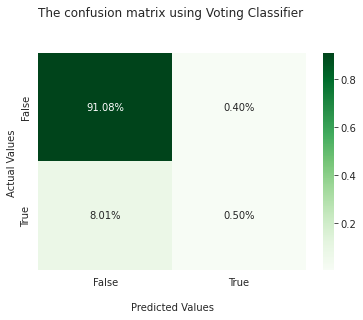

In [312]:
cmatrix_fun("Voting", y_test, y_pred_test_v_clf, 'Greens')

In [313]:
classification_report_fun("Voting", y_test, y_pred_test_v_clf)

The Classification Report for Voting Classifier:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     58512
           1       0.56      0.06      0.11      5447

    accuracy                           0.92     63959
   macro avg       0.74      0.53      0.53     63959
weighted avg       0.89      0.92      0.88     63959

